In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
os.makedirs('processed',exist_ok = True)

In [3]:
customer = pd.read_excel(r"C:\Users\Harshita Sahu\OneDrive\Documents\Market Insights for E-commerce Company\Datasets\CustomersData.xlsx")

In [4]:
discount = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Market Insights for E-commerce Company\Datasets\Discount_Coupon.csv")

In [5]:
marketing_spend = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Market Insights for E-commerce Company\Datasets\Marketing_Spend.csv")

In [6]:
Online_Sales = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Market Insights for E-commerce Company\Datasets\Online_Sales.csv")

In [7]:
tax_amount = pd.read_excel(r"C:\Users\Harshita Sahu\OneDrive\Documents\Market Insights for E-commerce Company\Datasets\Tax_amount.xlsx")

In [8]:
customer['Location'].value_counts()

Location
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

In [9]:
customer.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [10]:
discount.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [11]:
marketing_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [12]:
Online_Sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [13]:
Online_Sales.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [14]:
tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


### Visualization 

<Axes: title={'center': 'Maximum Customer Belong to which Location'}, xlabel='Location', ylabel='count'>

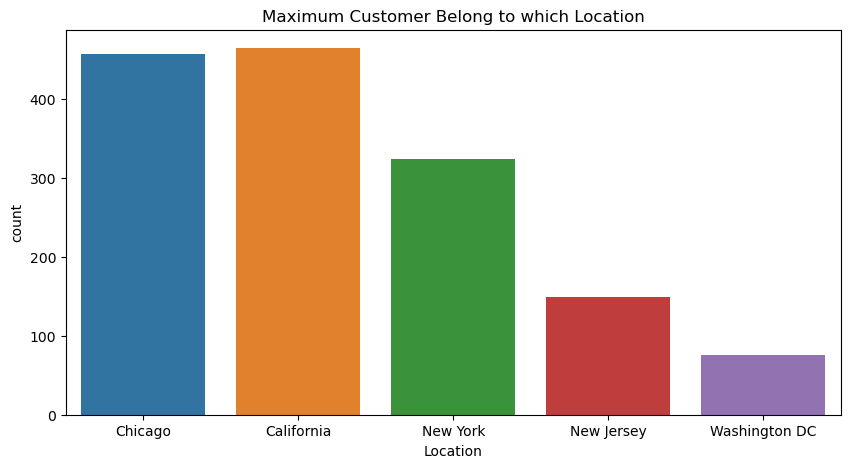

In [15]:
plt.figure(figsize = (10,5))
plt.title('Maximum Customer Belong to which Location')
sns.countplot(data = customer , x = customer['Location'])

<Axes: title={'center': 'Distribution of Customer by Gender'}, xlabel='Gender', ylabel='count'>

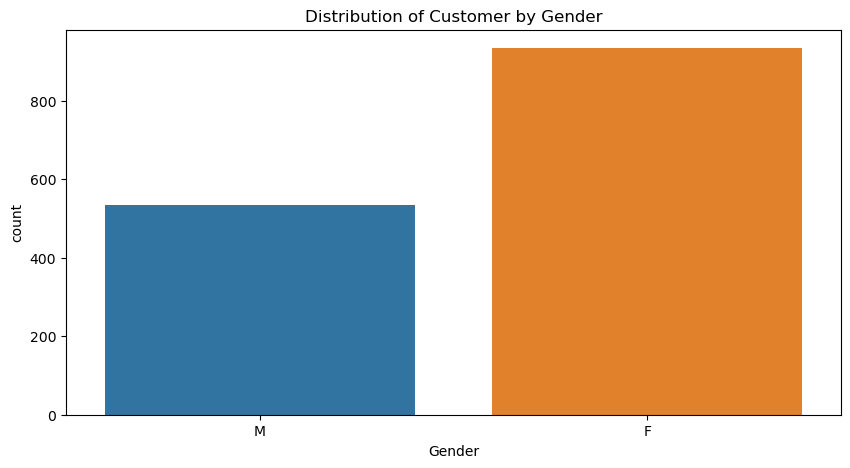

In [16]:
plt.figure(figsize = (10,5))
plt.title('Distribution of Customer by Gender')
sns.countplot(data = customer , x = customer['Gender'])

In [17]:
discount

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [18]:
max_discount_cupon = discount.groupby('Coupon_Code')['Discount_pct'].sum().sort_values(ascending = False).head(20).reset_index()
max_discount_cupon

,Coupon_Code,Discount_pct
0,EXTRA30,240
1,EXTRA20,160
2,WEMP30,120
3,ELEC30,120
4,NOTES30,120
5,NE30,120
6,NCA30,120
7,HOU30,120
8,HGEAR30,120
9,OFF30,120


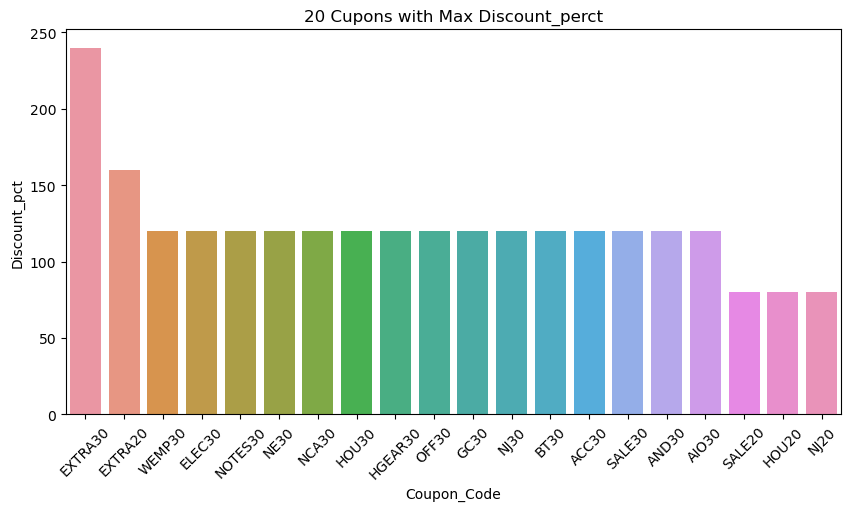

In [19]:
plt.figure(figsize = (10,5))
plt.title('20 Cupons with Max Discount_perct')
sns.barplot(data = max_discount_cupon , y= max_discount_cupon['Discount_pct'], x = max_discount_cupon['Coupon_Code'] )
plt.xticks(rotation = 45)
plt.show()

In [20]:
discount.columns = discount.columns.str.strip()

In [21]:
max_discount_category = discount.groupby('Product_Category')['Discount_pct'].sum().sort_values(ascending = False)#.head(20).reset_index()
max_discount_category

Product_Category
Accessories             240
Lifestyle               240
Office                  240
Notebooks & Journals    240
Notebooks               240
Nest-USA                240
Nest-Canada             240
Nest                    240
Housewares              240
Android                 240
Headgear                240
Gift Cards              240
Drinkware               240
Bottles                 240
Bags                    240
Apparel                 240
Waze                    240
Name: Discount_pct, dtype: int64

In [22]:
import datetime as dt

In [23]:
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])

In [24]:
offline_spend = marketing_spend['Offline_Spend'].sum()
online_spend = marketing_spend['Online_Spend'].sum()

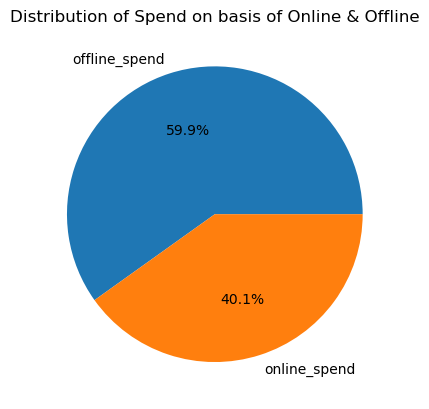

In [25]:
spend_values = [offline_spend ,online_spend]
spend_labels = ['offline_spend' ,'online_spend']

plt.title('Distribution of Spend on basis of Online & Offline')
plt.pie(x = spend_values , labels= spend_labels, autopct= '%1.1f%%')
plt.show()

In [26]:
cupon_grouped = Online_Sales.groupby('Coupon_Status')['Product_Category'].count()

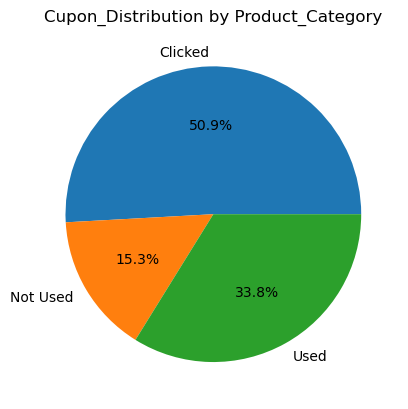

In [27]:
plt.title('Cupon_Distribution by Product_Category')
plt.pie( x= cupon_grouped , labels = cupon_grouped.index , autopct='%1.1f%%' )
plt.show()

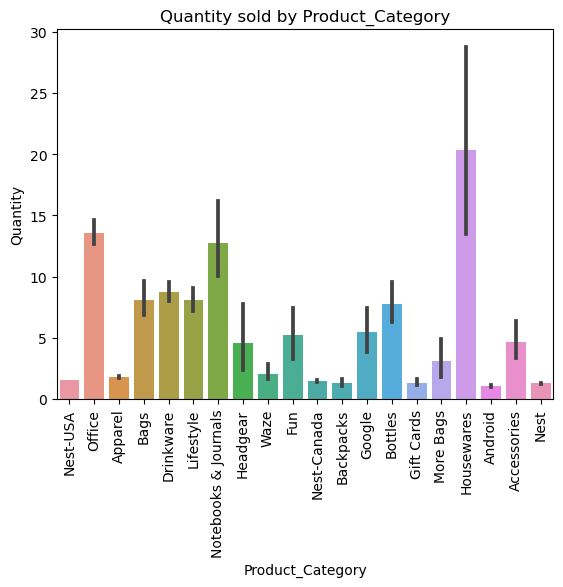

In [28]:
plt.title('Quantity sold by Product_Category')
sns.barplot(data = Online_Sales , x = Online_Sales['Product_Category'] , y = Online_Sales['Quantity'])
plt.xticks(rotation = 90)
plt.show()

In [29]:
Online_Sales['Transaction_Date'] = pd.to_datetime(Online_Sales['Transaction_Date'],format='%Y%m%d') 

In [30]:
tax_amount

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


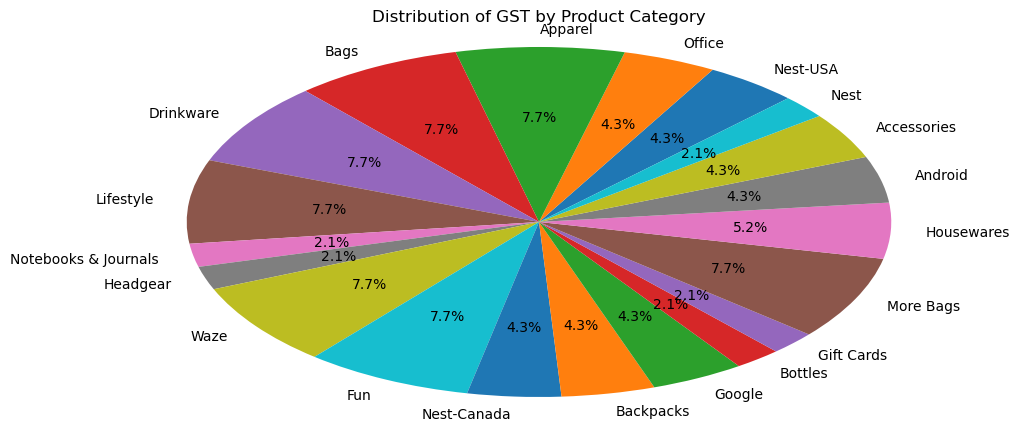

In [31]:
plt.figure(figsize = (10,5))
plt.title('Distribution of GST by Product Category')
plt.pie(x = tax_amount['GST'],labels= tax_amount['Product_Category'],autopct= '%1.1f%%',startangle=45)
plt.axis('auto') 
plt.show()

In [32]:
discount['Product_Category'].value_counts()

Product_Category
Apparel                 12
Waze                    12
Notebooks & Journals    12
Gift Cards              12
Accessories             12
Housewares              12
Nest-Canada             12
Bottles                 12
Nest                    12
Nest-USA                12
Headgear                12
Notebooks               12
Bags                    12
Lifestyle               12
Drinkware               12
Office                  12
Android                 12
Name: count, dtype: int64

In [33]:
### there are 204 rows are duplicated on the basis of product_category we need to first remove this before merge
discount[discount.duplicated(subset=['Product_Category'], keep = False)]

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [34]:
new_discount = discount.drop_duplicates(subset=['Product_Category'])

In [35]:
new_discount[new_discount.duplicated()]

,Month,Product_Category,Coupon_Code,Discount_pct


In [36]:
new_discount.shape

(17, 4)

In [37]:
discount

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [38]:
n = discount.groupby(['Month','Product_Category'])['Discount_pct'].mean().reset_index(name = 'Discount_Mean')
n

,Month,Product_Category,Discount_Mean
0,Apr,Accessories,10.0
1,Apr,Android,10.0
2,Apr,Apparel,10.0
3,Apr,Bags,10.0
4,Apr,Bottles,10.0
...,...,...,...
199,Sep,Nest-USA,30.0
200,Sep,Notebooks,30.0
201,Sep,Notebooks & Journals,30.0
202,Sep,Office,30.0


In [39]:
tax_amount['Product_Category'].value_counts()

Product_Category
Nest-USA                1
Office                  1
Accessories             1
Android                 1
Housewares              1
More Bags               1
Gift Cards              1
Bottles                 1
Google                  1
Backpacks               1
Nest-Canada             1
Fun                     1
Waze                    1
Headgear                1
Notebooks & Journals    1
Lifestyle               1
Drinkware               1
Bags                    1
Apparel                 1
Nest                    1
Name: count, dtype: int64

In [40]:
Online_Sales['Month'] = Online_Sales['Transaction_Date'].dt.strftime('%b')
Online_Sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan
...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec


## Combining the Table

In [41]:
combine_table = pd.merge(left = Online_Sales , right = customer ,how = 'left' , on = 'CustomerID' )\
   .merge(right = n,how = 'left' , on = ['Product_Category','Month'])\
   .merge(right = marketing_spend,how = 'left' ,left_on = 'Transaction_Date',right_on='Date' )\
   .merge(right = tax_amount,how = 'left' ,on = 'Product_Category' )

In [42]:
combine_table

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Discount_Mean,Date,Offline_Spend,Online_Spend,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,10.0,2019-01-01,4500,2424.50,0.10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,10.0,2019-01-01,4500,2424.50,0.10
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,M,Chicago,12,10.0,2019-01-01,4500,2424.50,0.10
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,M,Chicago,12,10.0,2019-01-01,4500,2424.50,0.18
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,M,Chicago,12,10.0,2019-01-01,4500,2424.50,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec,F,New York,45,30.0,2019-12-31,4000,2058.75,0.10
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec,F,New York,45,30.0,2019-12-31,4000,2058.75,0.18
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec,F,New York,45,30.0,2019-12-31,4000,2058.75,0.10
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec,F,California,7,30.0,2019-12-31,4000,2058.75,0.10


In [43]:
combine_table.rename(columns= {'Month':'Month_year'},inplace = True)

In [44]:
combine_table.rename(columns= {'Discount_Mean':'Discount_pct'},inplace = True)

In [45]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST'],
      dtype='object')

In [46]:
combine_table['Discount_pct'] = combine_table['Discount_pct']/100

In [47]:
combine_table['Invoice_Value'] = ((combine_table['Quantity']*combine_table['Avg_Price'])*(1-combine_table['Discount_pct'])*(1+combine_table['GST']))+combine_table['Delivery_Charges']

In [48]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value'],
      dtype='object')

In [49]:
combine_table['Price_Product'] = combine_table['Quantity'] * combine_table['Avg_Price'] 
combine_table['Average_Order_Value'] = combine_table.groupby('CustomerID')['Price_Product'].transform('mean')

In [50]:
combine_table['Price_Product']/combine_table['Price_Product'].sum()

0        3.290875e-05
1        3.290875e-05
2        4.388975e-07
3        1.876554e-05
4        3.532589e-06
             ...     
52919    2.596989e-05
52920    1.047359e-05
52921    3.251695e-05
52922    8.619518e-05
52923    6.895615e-05
Name: Price_Product, Length: 52924, dtype: float64

In [51]:
#combine_table['Month_year'] = pd.to_datetime(combine_table['Transaction_Date']).dt.strftime('%Y-%m')

In [52]:
Unique_Orders = combine_table.groupby('Month_year')['Transaction_ID'].nunique()
Total_Customer  = combine_table.groupby('Month_year')['CustomerID'].nunique()
Total_Purchase_Frequency = (Unique_Orders/Total_Customer).reset_index(name = 'percentage')

C:\Users\Harshita Sahu\Downloads\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshita Sahu\Downloads\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


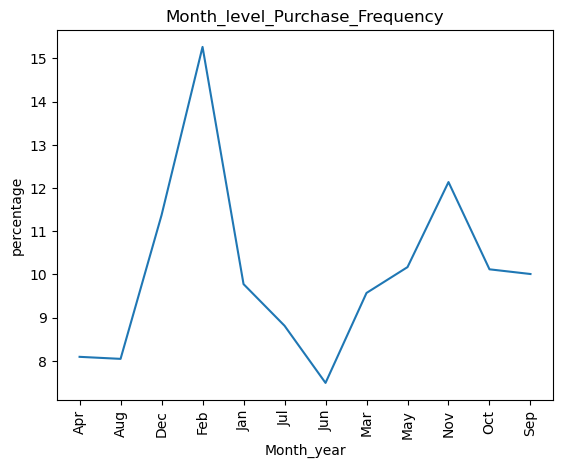

In [53]:
plt.title('Month_level_Purchase_Frequency')
sns.lineplot(data = Total_Purchase_Frequency , x = 'Month_year' , y = 'percentage')
plt.xticks(rotation = 90)
plt.show()

In [54]:
Unique_Orders = combine_table.groupby('Month_year')['Transaction_ID'].transform('nunique')
Customer_wise_transaction = combine_table.groupby(['Month_year','CustomerID'])['Transaction_ID'].transform('nunique')
combine_table['Customer_Purchase_Frequency'] = Customer_wise_transaction.div(Unique_Orders, level = 'Month_year')

In [55]:
Transaction_customer_monthly_wise = combine_table.groupby('Month_year')['Customer_Purchase_Frequency'].sum().reset_index(name = 'Customer_Purchase_Frequency_Percentage')
Transaction_customer_monthly_wise

,Month_year,Customer_Purchase_Frequency_Percentage
0,Apr,55.670160
1,Aug,45.969760
2,Dec,49.387481
3,Feb,54.697115
4,Jan,60.706470
5,Jul,55.049038
6,Jun,31.070619
7,Mar,48.629332
8,May,49.083579
9,Nov,40.202454


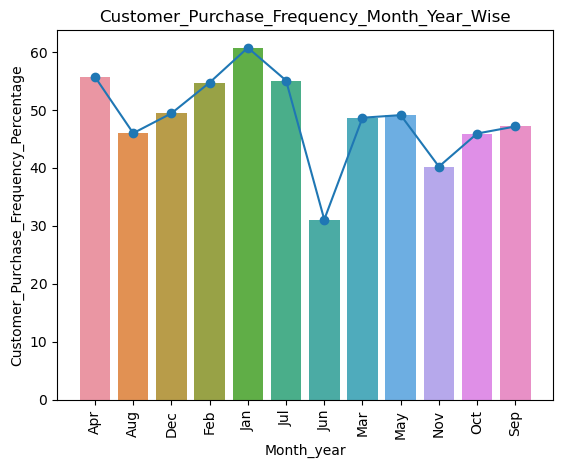

In [56]:
plt.title('Customer_Purchase_Frequency_Month_Year_Wise')
sns.barplot(data = Transaction_customer_monthly_wise ,x =  'Month_year', y = 'Customer_Purchase_Frequency_Percentage')
plt.plot(Transaction_customer_monthly_wise['Month_year'] ,  Transaction_customer_monthly_wise['Customer_Purchase_Frequency_Percentage'],marker = 'o')
plt.xticks(rotation = 90)
plt.show()

In [57]:
customer_purchase_count = combine_table.groupby('CustomerID')['Transaction_Date'].count()
repeat_cust = customer_purchase_count[customer_purchase_count>1]
len(repeat_cust)*100/len(customer_purchase_count)

95.50408719346049

In [58]:
one_time_purchaser = customer_purchase_count[customer_purchase_count==1].sum()
repeat_purchaser = customer_purchase_count[customer_purchase_count>1].sum()

In [59]:
purchase_type_size = [one_time_purchaser,repeat_purchaser]
purchase_type_size 

[66, 52858]

In [60]:
purchase_type_labels = ['one_time_purchaser','repeat_purchaser']

Text(0.5, 1.0, 'Purchase_Type')

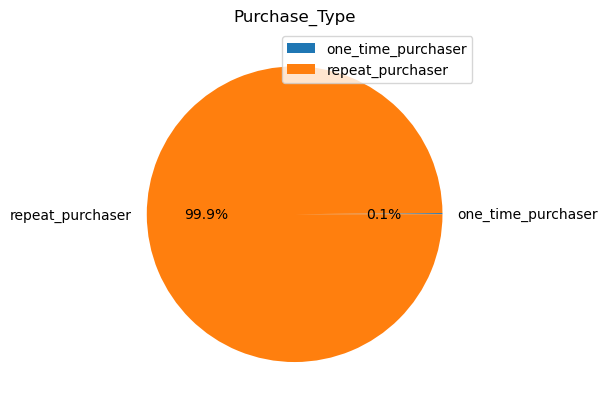

In [61]:
plt.pie(x = purchase_type_size , labels = purchase_type_labels,autopct='%1.1f%%')
plt.legend(purchase_type_labels)
plt.title('Purchase_Type')

In [62]:
new_cust_data = combine_table.groupby(['Month_year','CustomerID'])['Transaction_Date'].min().reset_index()
new_cust_data = new_cust_data.groupby('Month_year')['CustomerID'].count().reset_index(name = 'New_Customer_Count')


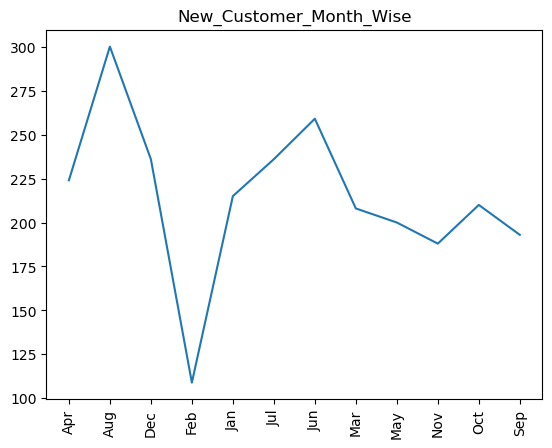

In [63]:
plt.title('New_Customer_Month_Wise')
plt.plot(new_cust_data['Month_year'],new_cust_data['New_Customer_Count'])
plt.xticks(rotation = 90)
plt.show()

In [64]:
Total_customer = combine_table['CustomerID'].count()
Total_customer

52924

In [65]:
cust_first_purchase = combine_table.groupby(['CustomerID','Month_year'])['Transaction_Date'].min().reset_index()
cust_first_purchase

,CustomerID,Month_year,Transaction_Date
0,12346,Sep,2019-09-15
1,12347,Mar,2019-03-24
2,12347,Nov,2019-11-01
3,12348,Jun,2019-06-22
4,12348,Oct,2019-10-19
...,...,...,...
2573,18269,Apr,2019-04-05
2574,18269,Jun,2019-06-20
2575,18277,Oct,2019-10-23
2576,18283,Jul,2019-07-29


In [66]:
Customer_Month_ON_Month_Basis = cust_first_purchase.groupby('Month_year')['CustomerID'].apply(set).to_dict()

In [67]:
Sorted_Months = sorted(Customer_Month_ON_Month_Basis.keys())

In [68]:
retention_cust ={}

for i in range(1,len(Sorted_Months)):
    prev_month = Sorted_Months[i-1]
    curr_months = Sorted_Months[i]

    retained_customer = Customer_Month_ON_Month_Basis[curr_months].intersection(Customer_Month_ON_Month_Basis[prev_month])

In [69]:
retention_cust['retained_customer'] = len(retained_customer)
retention_cust

{'retained_customer': 29}

In [70]:
combine_table

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tenure_Months,Discount_pct,Date,Offline_Spend,Online_Spend,GST,Invoice_Value,Price_Product,Average_Order_Value,Customer_Purchase_Frequency
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,12,0.1,2019-01-01,4500,2424.50,0.10,158.67290,153.71,116.33468,0.084206
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,12,0.1,2019-01-01,4500,2424.50,0.10,158.67290,153.71,116.33468,0.084206
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,12,0.1,2019-01-01,4500,2424.50,0.10,8.52950,2.05,116.33468,0.084206
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,12,0.1,2019-01-01,4500,2424.50,0.18,99.58430,87.65,116.33468,0.084206
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,12,0.1,2019-01-01,4500,2424.50,0.18,24.02300,16.50,116.33468,0.084206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,45,0.3,2019-12-31,4000,2058.75,0.10,99.90100,121.30,138.62375,0.002235
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,45,0.3,2019-12-31,4000,2058.75,0.18,46.90792,48.92,138.62375,0.002235
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,45,0.3,2019-12-31,4000,2058.75,0.10,123.44760,151.88,138.62375,0.002235
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,7,0.3,2019-12-31,4000,2058.75,0.10,316.50200,402.60,362.34000,0.000745


In [71]:
first_ever_transaction = combine_table.groupby(['CustomerID','Month_year'])['Transaction_Date'].min().reset_index()
first_ever_transaction.rename(columns = {'Transaction_Date' :'First_Transaction'},inplace = True)
#first_ever_transaction.rename(columns = {'Month_year' :'First_Transaction_Month'},inplace = True)

In [72]:
first_ever_transaction

,CustomerID,Month_year,First_Transaction
0,12346,Sep,2019-09-15
1,12347,Mar,2019-03-24
2,12347,Nov,2019-11-01
3,12348,Jun,2019-06-22
4,12348,Oct,2019-10-19
...,...,...,...
2573,18269,Apr,2019-04-05
2574,18269,Jun,2019-06-20
2575,18277,Oct,2019-10-23
2576,18283,Jul,2019-07-29


In [73]:
combine_table = combine_table.merge(first_ever_transaction, how = 'left' , on = ['CustomerID','Month_year'])
combine_table

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Discount_pct,Date,Offline_Spend,Online_Spend,GST,Invoice_Value,Price_Product,Average_Order_Value,Customer_Purchase_Frequency,First_Transaction
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.1,2019-01-01,4500,2424.50,0.10,158.67290,153.71,116.33468,0.084206,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.1,2019-01-01,4500,2424.50,0.10,158.67290,153.71,116.33468,0.084206,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,0.1,2019-01-01,4500,2424.50,0.10,8.52950,2.05,116.33468,0.084206,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,0.1,2019-01-01,4500,2424.50,0.18,99.58430,87.65,116.33468,0.084206,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,0.1,2019-01-01,4500,2424.50,0.18,24.02300,16.50,116.33468,0.084206,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,0.3,2019-12-31,4000,2058.75,0.10,99.90100,121.30,138.62375,0.002235,2019-12-31
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,0.3,2019-12-31,4000,2058.75,0.18,46.90792,48.92,138.62375,0.002235,2019-12-31
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,0.3,2019-12-31,4000,2058.75,0.10,123.44760,151.88,138.62375,0.002235,2019-12-31
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,0.3,2019-12-31,4000,2058.75,0.10,316.50200,402.60,362.34000,0.000745,2019-12-31


In [74]:
combine_table['Customer_Type'] = combine_table.apply(lambda x :'New_Customer' if x['Transaction_Date'] == x['First_Transaction'] else 'Exsisting_Customer',axis = 1)

In [75]:
customer_typ = combine_table['Customer_Type'].value_counts()
customer_typ

Customer_Type
New_Customer          41630
Exsisting_Customer    11294
Name: count, dtype: int64

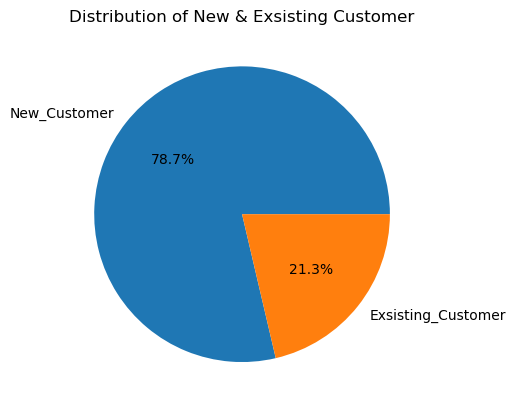

In [76]:
plt.title('Distribution of New & Exsisting Customer')
plt.pie(x = customer_typ.values,data = customer_typ,labels = customer_typ.index , autopct= '%1.1f%%')
plt.show()

Text(0, 0.5, 'Discount_pct')

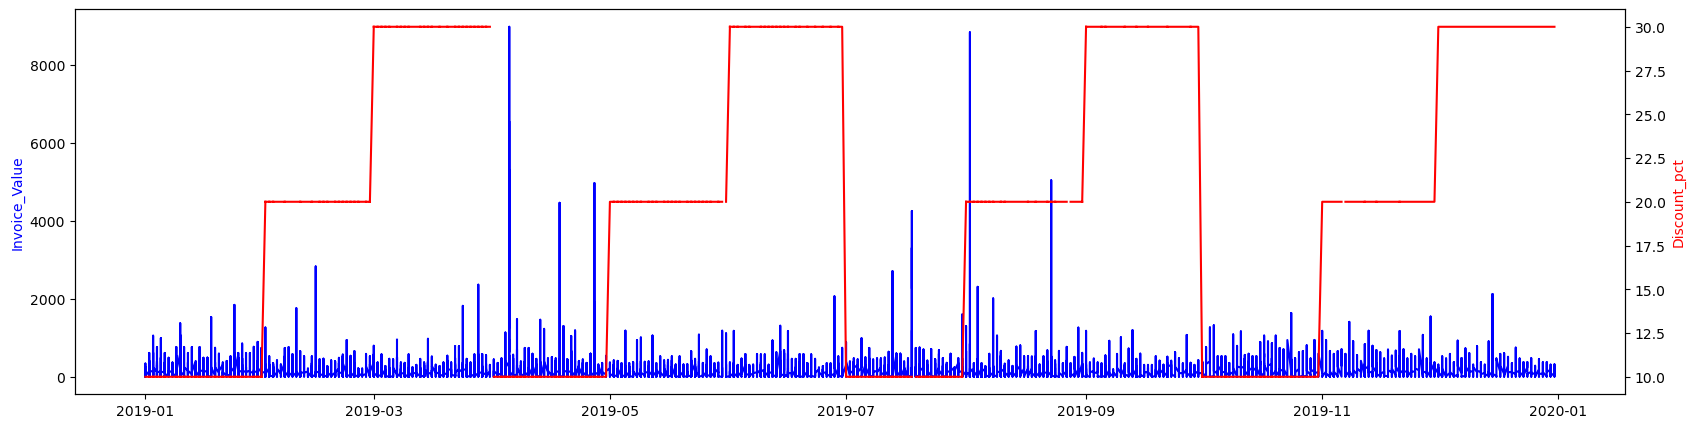

In [77]:
cols = ['Invoice_Value','Discount_pct']
figure,ax1 = plt.subplots(figsize=(20,5))

ax1.plot(combine_table['Transaction_Date'] , combine_table['Invoice_Value'] , color = 'blue')
ax1.set_ylabel('Invoice_Value',color = 'blue')

ax2 = ax1.twinx()

ax2.plot(combine_table['Transaction_Date'] ,  combine_table['Discount_pct']*100 , color = 'red')
ax2.set_ylabel('Discount_pct',color = 'red')

In [78]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value', 'Price_Product',
       'Average_Order_Value', 'Customer_Purchase_Frequency',
       'First_Transaction', 'Customer_Type'],
      dtype='object')

In [79]:
Total_Revenue = combine_table['Invoice_Value'].sum()
Total_Revenue

4677562.21867

In [80]:
Total_No_orders = combine_table['Transaction_ID'].count()
Total_No_orders

52924

In [81]:
Avg_Order_Value  = combine_table['Invoice_Value'].mean()
Avg_Order_Value 

89.05571203011957

In [82]:
customer_typ = combine_table['Customer_Type'].value_counts()
dict(customer_typ)

{'New_Customer': 41630, 'Exsisting_Customer': 11294}

In [83]:
month_qty_sales = combine_table.groupby('Month_year')['Quantity'].sum().reset_index(name = 'Quantity_Sold')
month_qty_sales

,Month_year,Quantity_Sold
0,Apr,25277
1,Aug,27457
2,Dec,12667
3,Feb,16575
4,Jan,20140
5,Jul,22898
6,Jun,21619
7,Mar,20787
8,May,18715
9,Nov,15120


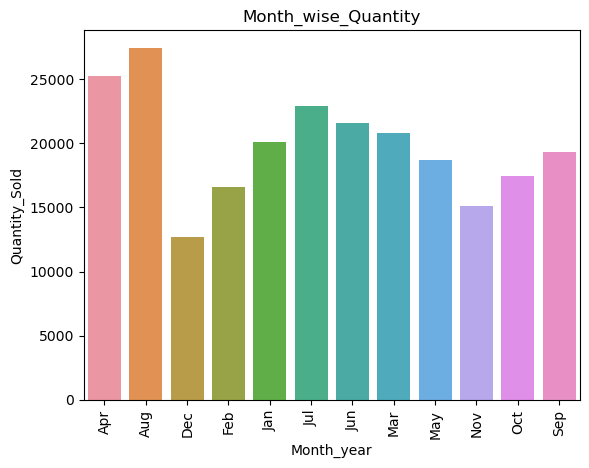

In [84]:
plt.title('Month_wise_Quantity')
sns.barplot(x = 'Month_year' , y = 'Quantity_Sold' , data  = month_qty_sales)
plt.xticks(rotation = 90)
plt.show()

In [85]:
category_qty_sales = combine_table.groupby('Product_Category')['Quantity'].sum().reset_index(name = 'Quantity_Sold')
category_qty_sales

,Product_Category,Quantity_Sold
0,Accessories,1097
1,Android,45
2,Apparel,32438
3,Backpacks,113
4,Bags,15273
5,Bottles,2090
6,Drinkware,30501
7,Fun,834
8,Gift Cards,206
9,Google,575


Text(0.5, 1.0, 'Quantity by Product_Category_Sold')

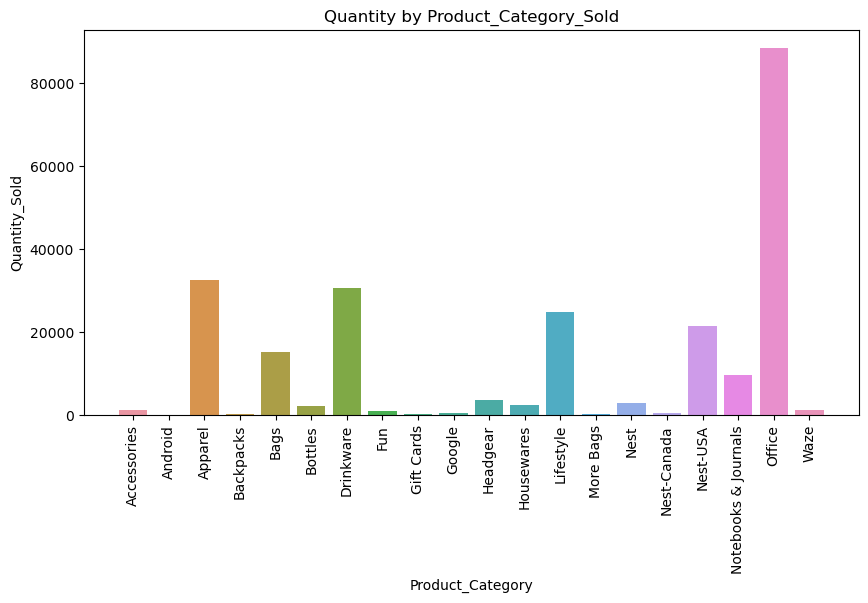

In [86]:
plt.figure(figsize= (10,5))
sns.barplot(x ='Product_Category'  , y =   'Quantity_Sold', data = category_qty_sales)
plt.axis('auto')
plt.xticks(rotation = 90)
plt.title('Quantity by Product_Category_Sold')

In [87]:
combine_table['Day'] = combine_table['Transaction_Date'].dt.day_name()

In [88]:
combine_table['week'] = combine_table['Transaction_Date'].dt.isocalendar().week

In [89]:
qty_day = combine_table.groupby('Day')['Quantity'].sum().reset_index(name = 'Quantity_Sold')
qty_day

,Day,Quantity_Sold
0,Friday,52433
1,Monday,11983
2,Saturday,37965
3,Sunday,40056
4,Thursday,44482
5,Tuesday,11317
6,Wednesday,39797


Text(0.5, 1.0, 'Qty sold by Day ')

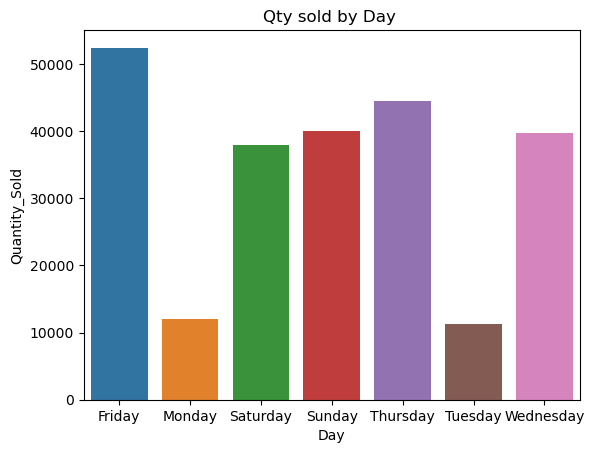

In [90]:
sns.barplot(x = 'Day' , y = 'Quantity_Sold' , data = qty_day)
plt.title('Qty sold by Day ')

In [91]:
qty_week= combine_table.groupby('week')['Quantity'].sum().reset_index(name = 'Quantity_Sold')
qty_week

,week,Quantity_Sold
0,1,5964
1,2,4665
2,3,4319
3,4,3074
4,5,4317
5,6,3655
6,7,5255
7,8,3675
8,9,3642
9,10,4574


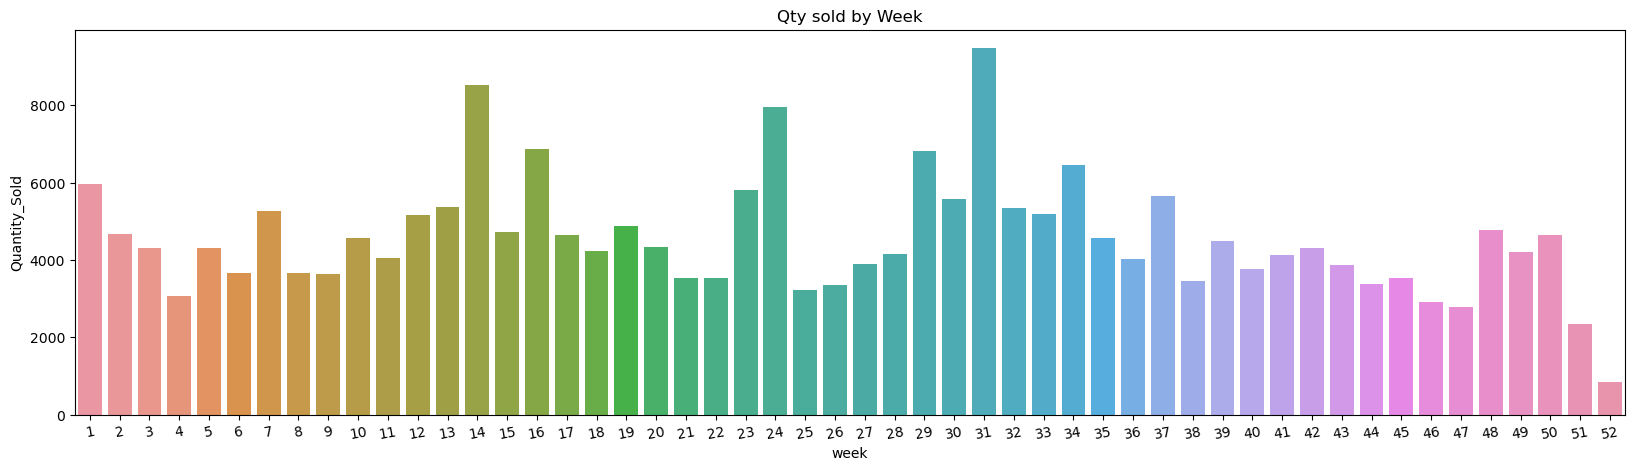

In [92]:
plt.figure(figsize= (20,5))
sns.barplot(x = 'week' , y = 'Quantity_Sold' , data = qty_week)
plt.title('Qty sold by Week')
plt.xticks(rotation = 10)
plt.show()

In [93]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value', 'Price_Product',
       'Average_Order_Value', 'Customer_Purchase_Frequency',
       'First_Transaction', 'Customer_Type', 'Day', 'week'],
      dtype='object')

In [94]:

sales_by_transaction = combine_table.groupby('Day')[['Invoice_Value','Transaction_ID']].agg({'Invoice_Value':'sum','Transaction_ID':'count'}).reset_index().sort_values(by = ['Invoice_Value','Transaction_ID'],ascending = False)

sales_by_transaction.rename(columns = {'Transaction_ID' : 'Transaction_Count'},inplace = True)

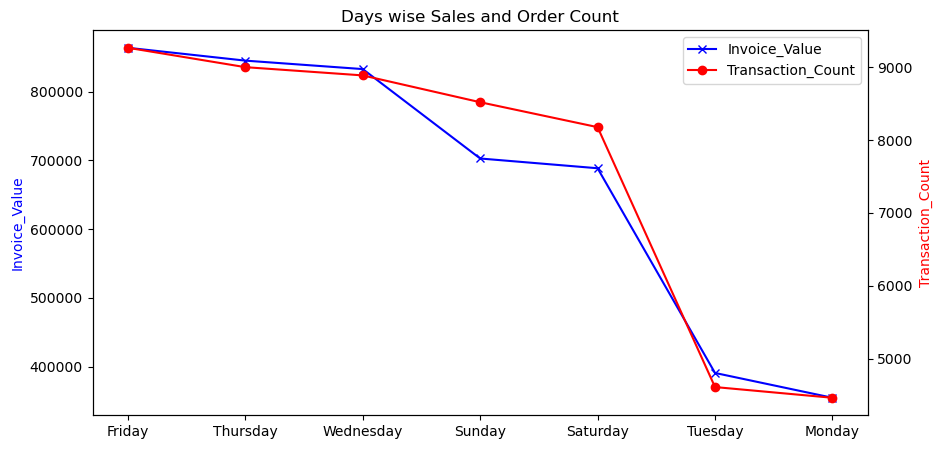

In [95]:
figure , ax1 = plt.subplots(figsize= (10,5))
plt.title('Days wise Sales and Order Count')

line_1, = ax1.plot('Day' , 'Invoice_Value', data = sales_by_transaction,color = 'blue',marker = 'x')
ax1.set_ylabel('Invoice_Value',color = 'blue')

ax2 = ax1.twinx()

line_2, = ax2.plot('Day','Transaction_Count',data = sales_by_transaction,color = 'red',marker= 'o')
ax2.set_ylabel('Transaction_Count',color = 'red')

line = [line_1,line_2]
labels = [l.get_label() for l in line]
ax1.legend(line,labels , loc = 'upper right')
    

Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.

In [96]:
cols = combine_table[['Offline_Spend','Online_Spend','Invoice_Value','Month_year']]
cols

,Offline_Spend,Online_Spend,Invoice_Value,Month_year
0,4500,2424.50,158.67290,Jan
1,4500,2424.50,158.67290,Jan
2,4500,2424.50,8.52950,Jan
3,4500,2424.50,99.58430,Jan
4,4500,2424.50,24.02300,Jan
...,...,...,...,...
52919,4000,2058.75,99.90100,Dec
52920,4000,2058.75,46.90792,Dec
52921,4000,2058.75,123.44760,Dec
52922,4000,2058.75,316.50200,Dec


In [97]:
import warnings 
warnings.filterwarnings('ignore')

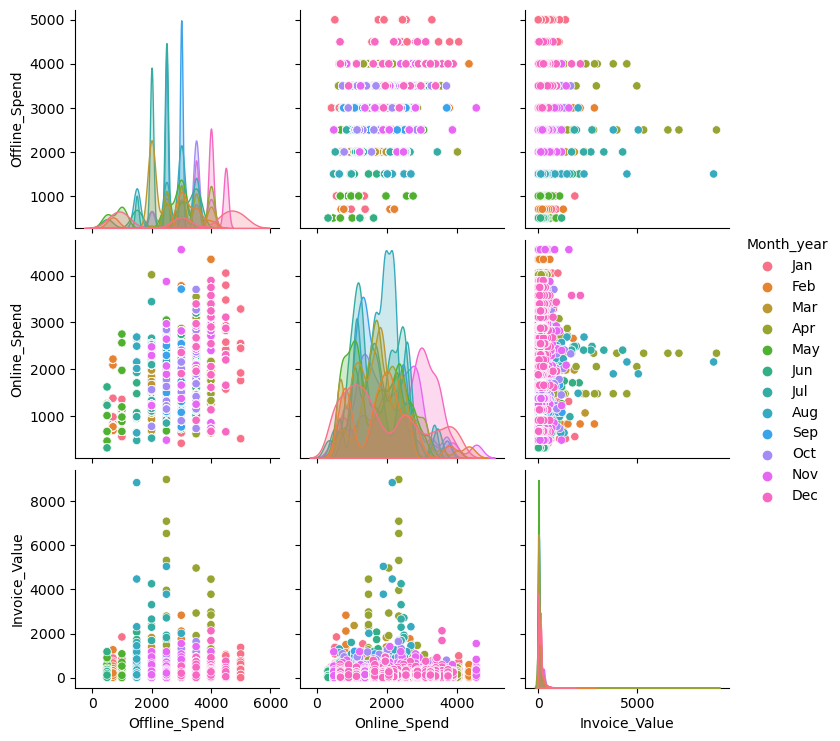

In [98]:
sns.pairplot(data = cols , vars = ['Offline_Spend','Online_Spend','Invoice_Value'],hue= 'Month_year')

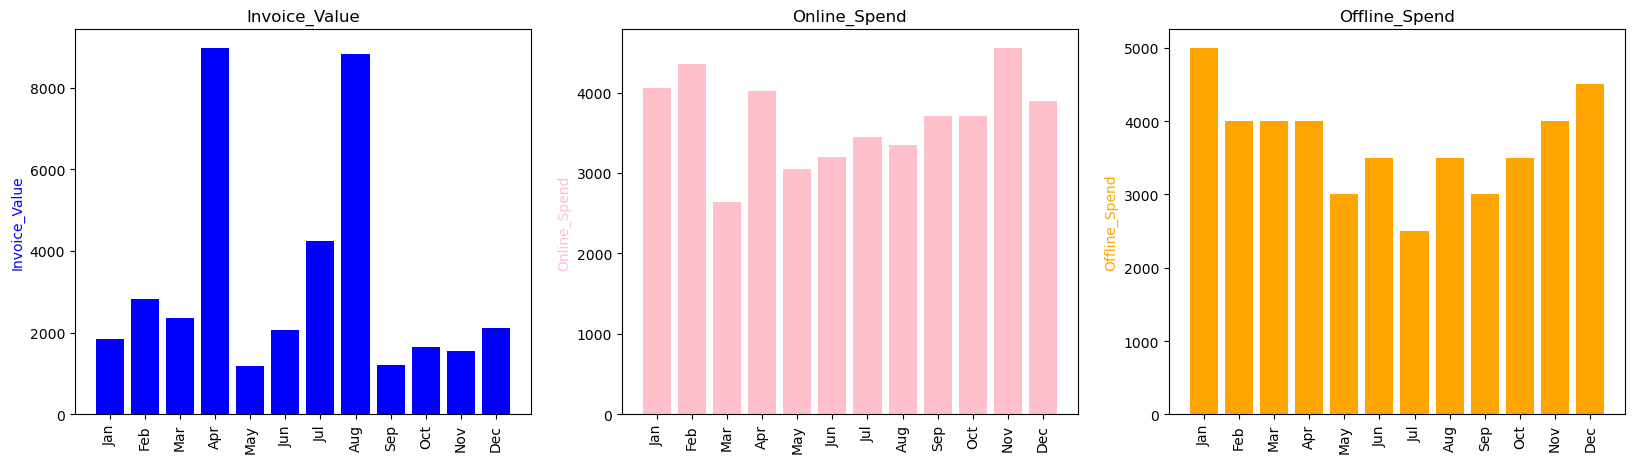

In [99]:
figure,axes = plt.subplots(1,3,figsize = (20,5))

axes[0].bar(cols['Month_year'],cols['Invoice_Value'],label = 'Invoice_Value',color = 'blue')
axes[0].set_ylabel('Invoice_Value',color = 'blue')
axes[0].set_title('Invoice_Value')


axes[1].bar(cols['Month_year'],cols['Online_Spend'],label = 'Online_Spend',color = 'pink')
axes[1].set_ylabel('Online_Spend',color = 'pink')
axes[1].set_title('Online_Spend')


axes[2].bar(cols['Month_year'],cols['Offline_Spend'],label = 'Offline_Spend',color = 'Orange')
axes[2].set_ylabel('Offline_Spend',color = 'Orange')
axes[2].set_title('Offline_Spend')

for ax in axes:
    ax.tick_params(axis = 'x',rotation = 90)

-----% Delivery Charges by Month

In [100]:
 combine_table[['Delivery_Charges','Month_year']]

,Delivery_Charges,Month_year
0,6.50,Jan
1,6.50,Jan
2,6.50,Jan
3,6.50,Jan
4,6.50,Jan
...,...,...
52919,6.50,Dec
52920,6.50,Dec
52921,6.50,Dec
52922,6.50,Dec


In [101]:
percentage_Delivery_Month = combine_table.groupby('Month_year')['Delivery_Charges'].sum()*100 /  combine_table['Delivery_Charges'].sum()

In [102]:
percentage_Delivery_Month = percentage_Delivery_Month.reset_index(name = 'Percentage_by_Month')

In [103]:
percentage_Delivery_Month

,Month_year,Percentage_by_Month
0,Apr,7.452233
1,Aug,10.976594
2,Dec,6.805534
3,Feb,8.841807
4,Jan,10.642937
5,Jul,8.753299
6,Jun,6.739349
7,Mar,10.922765
8,May,7.436860
9,Nov,5.804868


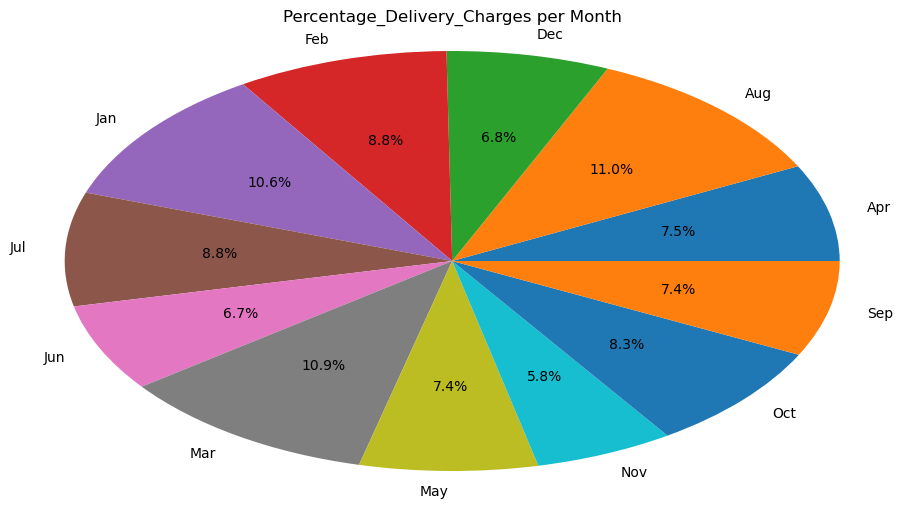

In [104]:
plt.figure(figsize= (11,6))
plt.title('Percentage_Delivery_Charges per Month')
plt.pie(percentage_Delivery_Month['Percentage_by_Month'] , labels = percentage_Delivery_Month['Month_year'],autopct= '%1.1f%%')
plt.axis('auto')
plt.show()

In [105]:
combine_table[['GST','Month_year']]

,GST,Month_year
0,0.10,Jan
1,0.10,Jan
2,0.10,Jan
3,0.18,Jan
4,0.18,Jan
...,...,...
52919,0.10,Dec
52920,0.18,Dec
52921,0.10,Dec
52922,0.10,Dec


---- Monthly Tax

In [106]:
Tax_Month = combine_table.groupby('Month_year')['GST'].sum()*100/combine_table['GST'].sum()
Tax_Month

Month_year
Apr     8.131375
Aug    12.555412
Dec     7.544711
Feb     6.144305
Jan     7.354746
Jul    10.456452
Jun     8.253574
Mar     8.467456
May     9.102780
Nov     6.338943
Oct     7.443268
Sep     8.206976
Name: GST, dtype: float64

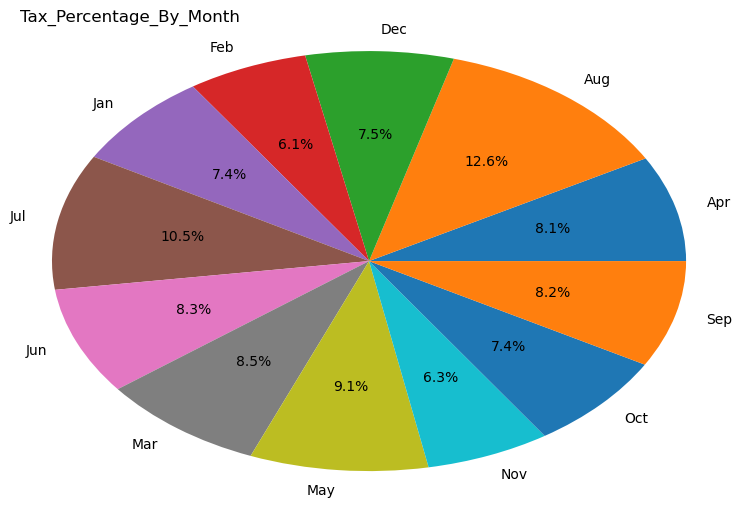

In [107]:
plt.figure(figsize = (9,6))
plt.title('Tax_Percentage_By_Month',loc = 'left')
plt.pie(Tax_Month.values, labels = Tax_Month.index,autopct = '%1.1f%%', rotatelabels = False)
plt.axis('auto')
plt.show()

In [108]:
combine_table[['Online_Spend','Offline_Spend']]

,Online_Spend,Offline_Spend
0,2424.50,4500
1,2424.50,4500
2,2424.50,4500
3,2424.50,4500
4,2424.50,4500
...,...,...
52919,2058.75,4000
52920,2058.75,4000
52921,2058.75,4000
52922,2058.75,4000


In [109]:
Online_spend = combine_table['Online_Spend'].sum()
Offline_Spend = combine_table['Offline_Spend'].sum()
list = [Online_spend,Offline_Spend]
list_label = ['Online_spend','Offline_Spend']

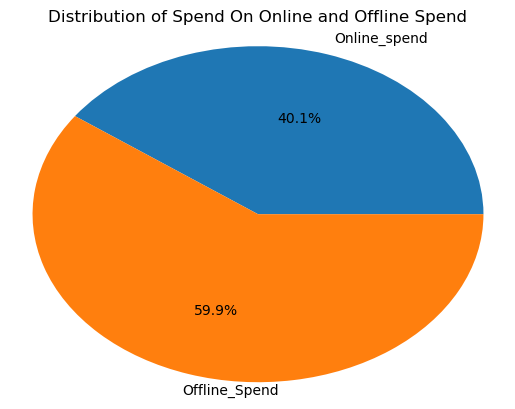

In [110]:
plt.title('Distribution of Spend On Online and Offline Spend',loc= 'center')
plt.pie(x =list , labels =  list_label,autopct='%1.1f%%',center = (0.5,0.5))
plt.axis('auto')
plt.show()

In [111]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value', 'Price_Product',
       'Average_Order_Value', 'Customer_Purchase_Frequency',
       'First_Transaction', 'Customer_Type', 'Day', 'week'],
      dtype='object')

In [112]:
monthly_spend = combine_table.groupby('Month_year')[['Online_Spend','Offline_Spend']].sum().reset_index()

In [113]:
monthly_spend['Total_spend'] = monthly_spend['Online_Spend'] + monthly_spend['Offline_Spend'] 
monthly_spend

,Month_year,Online_Spend,Offline_Spend,Total_spend
0,Apr,8196922.13,13459000,21655922.13
1,Aug,11551233.77,16834500,28385733.77
2,Dec,11244402.01,17720000,28964402.01
3,Feb,6360136.05,9481400,15841536.05
4,Jan,7686875.17,12365900,20052775.17
5,Jul,9055934.41,11563000,20618934.41
6,Jun,7436403.73,11189000,18625403.73
7,Mar,6965280.31,10488500,17453780.31
8,May,7574021.02,9951500,17525521.02
9,Nov,8934799.69,12161500,21096299.69


In [114]:
Total_Revenue_Monthly = combine_table.groupby('Month_year')['Invoice_Value'].sum().reset_index()
Total_Revenue_Monthly

,Month_year,Invoice_Value
0,Apr,441974.38503
1,Aug,415699.17184
2,Dec,439530.03015
3,Feb,324330.66720
4,Jan,460087.03245
5,Jul,419784.20761
6,Jun,287125.25071
7,Mar,330923.97143
8,May,313637.96936
9,Nov,475482.19736


In [115]:
spend_Revenue = monthly_spend.merge(Total_Revenue_Monthly, on = 'Month_year')
spend_Revenue

,Month_year,Online_Spend,Offline_Spend,Total_spend,Invoice_Value
0,Apr,8196922.13,13459000,21655922.13,441974.38503
1,Aug,11551233.77,16834500,28385733.77,415699.17184
2,Dec,11244402.01,17720000,28964402.01,439530.03015
3,Feb,6360136.05,9481400,15841536.05,324330.66720
4,Jan,7686875.17,12365900,20052775.17,460087.03245
5,Jul,9055934.41,11563000,20618934.41,419784.20761
6,Jun,7436403.73,11189000,18625403.73,287125.25071
7,Mar,6965280.31,10488500,17453780.31,330923.97143
8,May,7574021.02,9951500,17525521.02,313637.96936
9,Nov,8934799.69,12161500,21096299.69,475482.19736


Text(0.5, 0.98, 'Marketing_spend V\\S Revenue')

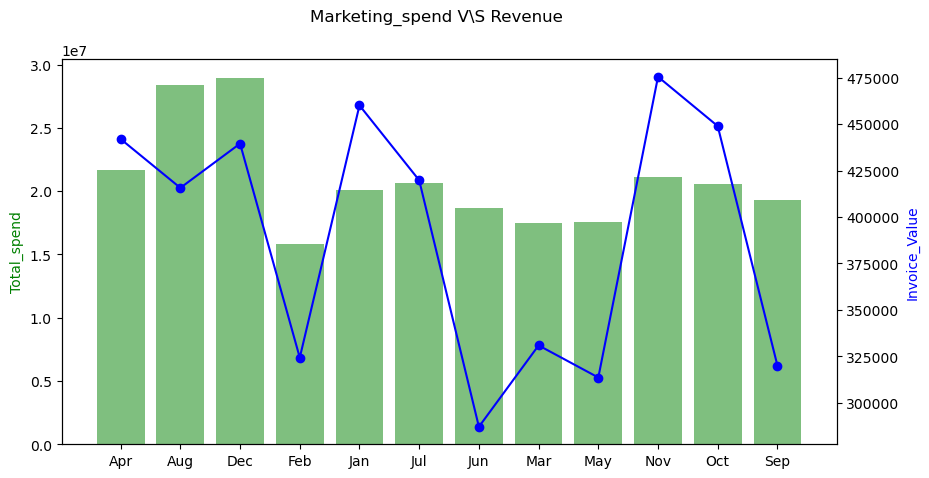

In [116]:
figure,ax1 = plt.subplots(figsize = (10,5))

ax1.bar(spend_Revenue['Month_year'],spend_Revenue['Total_spend'],color = 'green',alpha = 0.5)
ax1.set_ylabel('Total_spend',color = 'green')

ax2 = ax1.twinx()

ax2.plot(spend_Revenue['Month_year'],spend_Revenue['Invoice_Value'],color = 'blue',marker = 'o')
ax2.set_ylabel('Invoice_Value',color = 'blue')

figure.suptitle('Marketing_spend V\S Revenue')


In [117]:
corr = spend_Revenue[['Total_spend','Invoice_Value']].corr()
corr

,Total_spend,Invoice_Value
Total_spend,1.000000,0.559731
Invoice_Value,0.559731,1.000000


In [118]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value', 'Price_Product',
       'Average_Order_Value', 'Customer_Purchase_Frequency',
       'First_Transaction', 'Customer_Type', 'Day', 'week'],
      dtype='object')

In [119]:
combine_table[['Location','Product_Category','Invoice_Value','Transaction_ID','Quantity','Month_year']]

,Location,Product_Category,Invoice_Value,Transaction_ID,Quantity,Month_year
0,Chicago,Nest-USA,158.67290,16679,1,Jan
1,Chicago,Nest-USA,158.67290,16680,1,Jan
2,Chicago,Office,8.52950,16681,1,Jan
3,Chicago,Apparel,99.58430,16682,5,Jan
4,Chicago,Bags,24.02300,16682,1,Jan
...,...,...,...,...,...,...
52919,New York,Nest-USA,99.90100,48493,1,Dec
52920,New York,Apparel,46.90792,48494,1,Dec
52921,New York,Nest-USA,123.44760,48495,1,Dec
52922,California,Nest-USA,316.50200,48496,5,Dec


In [274]:
Location_analysis = combine_table.groupby(['Location','Product_Category','Month_year']).agg({'Transaction_ID':'count','Quantity':'sum','Invoice_Value':'sum'})

In [275]:
Location_analysis = Location_analysis.reset_index()
Location_analysis

,Location,Product_Category,Month_year,Transaction_ID,Quantity,Invoice_Value
0,California,Accessories,Aug,3,3,66.85160
1,California,Accessories,Dec,21,41,248.69640
2,California,Accessories,Jul,3,41,1846.51810
3,California,Accessories,Jun,5,5,180.39550
4,California,Accessories,May,2,2,38.91040
...,...,...,...,...,...,...
885,Washington DC,Waze,Jun,1,1,10.61734
886,Washington DC,Waze,Mar,1,1,11.11734
887,Washington DC,Waze,Nov,5,11,181.12496
888,Washington DC,Waze,Oct,2,2,339.53676


In [276]:
Location_analysis['Location'].nunique()

5

In [124]:
Location_analysis.columns

Index(['Location', 'Product_Category', 'Month_year', 'Transaction_ID',
       'Quantity', 'Invoice_Value'],
      dtype='object')

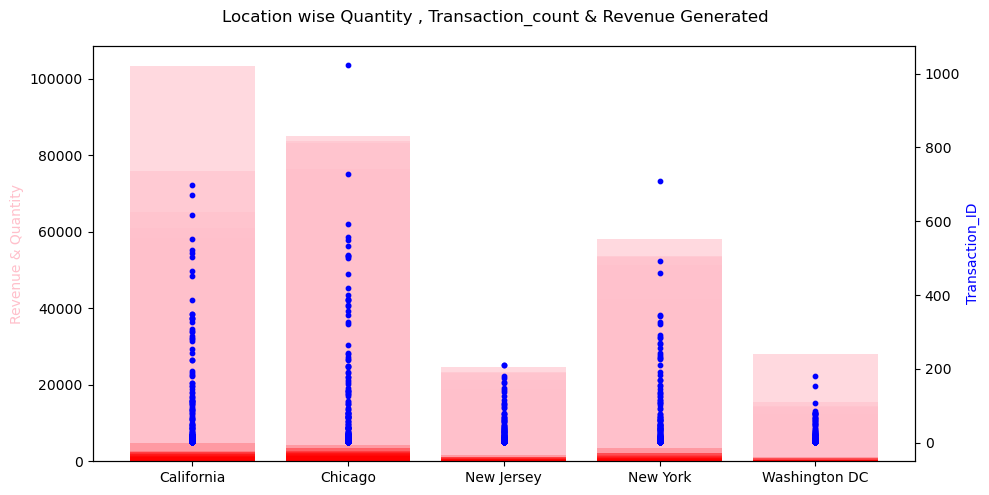

In [125]:
figure,ax1 = plt.subplots(figsize = (10,5))

ax1.bar( 'Location', 'Invoice_Value',data = Location_analysis,color = 'pink',alpha = 0.6)
ax1.bar('Location', 'Quantity',data = Location_analysis,color = 'red',alpha = 0.2)
ax1.set_ylabel('Revenue & Quantity',color = 'pink')

ax2 = ax1.twinx()
ax2.scatter('Location', 'Transaction_ID',data = Location_analysis,color = 'blue',s = 10)
ax2.set_ylabel('Transaction_ID',color = 'blue')

plt.suptitle('Location wise Quantity , Transaction_count & Revenue Generated')
plt.tight_layout()

Text(0.5, 0, 'Location')

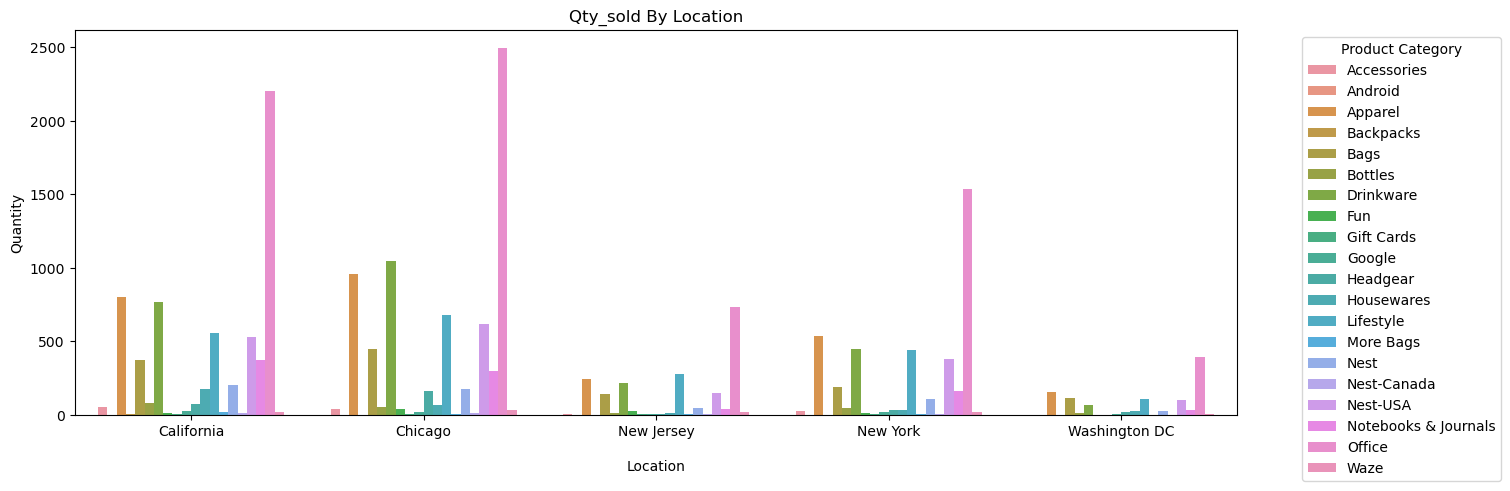

In [126]:
plt.figure(figsize = (15,5))
plt.title('Qty_sold By Location')
sns.barplot(data = Location_analysis , x = 'Location' , y = 'Quantity' , hue = 'Product_Category',ci = None )
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Location',labelpad= 15)

In [127]:
Product_cat_by_qty = combine_table.groupby('Product_Category')['Quantity'].sum().reset_index(name = 'Qty_Count').sort_values(by = 'Qty_Count',ascending = False)

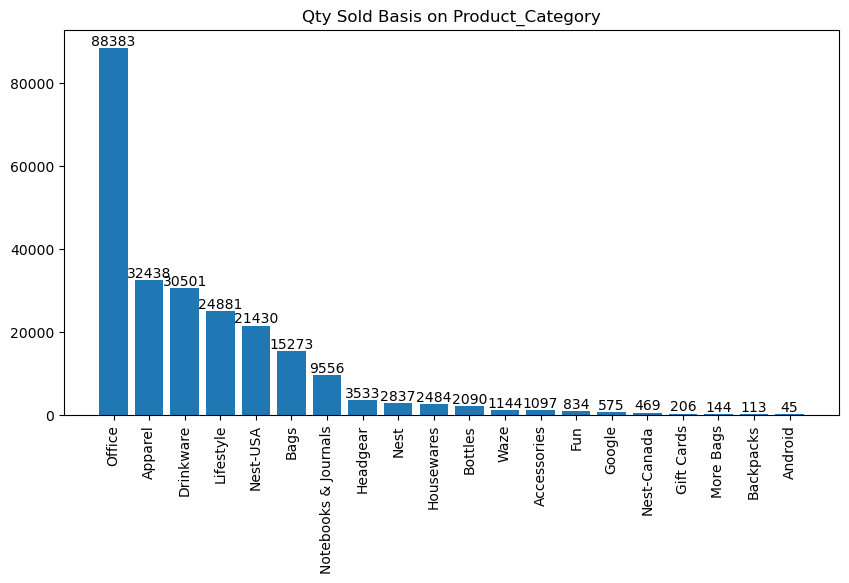

In [128]:
plt.figure(figsize = (10,5))
plt.title('Qty Sold Basis on Product_Category')
bars = plt.bar('Product_Category', 'Qty_Count',data =  Product_cat_by_qty)
plt.xticks(rotation = 90)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+0.5,str(height),ha = 'center',va = 'bottom')

plt.show()

In [129]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value', 'Price_Product',
       'Average_Order_Value', 'Customer_Purchase_Frequency',
       'First_Transaction', 'Customer_Type', 'Day', 'week'],
      dtype='object')

In [130]:
combine_table

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Online_Spend,GST,Invoice_Value,Price_Product,Average_Order_Value,Customer_Purchase_Frequency,First_Transaction,Customer_Type,Day,week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,2424.50,0.10,158.67290,153.71,116.33468,0.084206,2019-01-01,New_Customer,Tuesday,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,2424.50,0.10,158.67290,153.71,116.33468,0.084206,2019-01-01,New_Customer,Tuesday,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,2424.50,0.10,8.52950,2.05,116.33468,0.084206,2019-01-01,New_Customer,Tuesday,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,2424.50,0.18,99.58430,87.65,116.33468,0.084206,2019-01-01,New_Customer,Tuesday,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,2424.50,0.18,24.02300,16.50,116.33468,0.084206,2019-01-01,New_Customer,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,2058.75,0.10,99.90100,121.30,138.62375,0.002235,2019-12-31,New_Customer,Tuesday,1
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,2058.75,0.18,46.90792,48.92,138.62375,0.002235,2019-12-31,New_Customer,Tuesday,1
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,2058.75,0.10,123.44760,151.88,138.62375,0.002235,2019-12-31,New_Customer,Tuesday,1
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,2058.75,0.10,316.50200,402.60,362.34000,0.000745,2019-12-31,New_Customer,Tuesday,1


In [131]:
combine_table['Transaction_Date'].max()

Timestamp('2019-12-31 00:00:00')

In [132]:
last_seen = (combine_table['Transaction_Date'].max() - combine_table.groupby('CustomerID')['Transaction_Date'].max()).reset_index(name = 'Recency')

In [133]:
combine_table = combine_table.merge(last_seen,on = 'CustomerID')

In [134]:
monetary =combine_table.groupby('CustomerID')['Invoice_Value'].sum().reset_index(name = 'Monetary')
monetary

,CustomerID,Monetary
0,12346,174.98174
1,12347,12059.17780
2,12348,1501.92620
3,12350,1183.71394
4,12356,1753.45086
...,...,...
1463,18259,789.15360
1464,18260,2573.65633
1465,18269,155.66092
1466,18277,301.02000


In [135]:
combine_table = combine_table.merge(monetary,on = 'CustomerID')

In [136]:
frequency = combine_table.groupby('CustomerID')['Transaction_ID'].count().reset_index(name = 'Frequency')

In [137]:
combine_table = combine_table.merge(frequency,on = 'CustomerID')

In [138]:
combine_table['Recency'] = combine_table['Recency'].dt.days

In [139]:
combine_table['RFM_SCORE'] = (combine_table['Recency']*100) + (combine_table['Frequency']*10) + combine_table['Monetary'] 

In [140]:
combine_table['RFM_SCORE'].max()

93837.52061

In [141]:
combine_table['RFM_SCORE'].min()

537.4171200000001

In [142]:
combine_table['Recency_Score'] = pd.qcut(combine_table['Recency'], 4,labels = [1,2,3,4])

In [143]:
combine_table['Frequency_Score'] = pd.qcut(combine_table['Frequency'], 4,labels = [1,2,3,4])

In [144]:
combine_table['Monetary_Score'] = pd.qcut(combine_table['Monetary'], 4,labels = [1,2,3,4])

In [145]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value', 'Price_Product',
       'Average_Order_Value', 'Customer_Purchase_Frequency',
       'First_Transaction', 'Customer_Type', 'Day', 'week', 'Recency',
       'Monetary', 'Frequency', 'RFM_SCORE', 'Recency_Score',
       'Frequency_Score', 'Monetary_Score'],
      dtype='object')

------------Classifying the customer on the RFM basis

In [146]:
def segement(row):
    if row['Recency_Score']>3 and row['Frequency_Score']>3 and row['Monetary_Score']>3:
        return 'Gold'
    elif row['Recency_Score']==3 and row['Frequency_Score']==3 and row['Monetary_Score']==3:
        return 'Silver'
    elif row['Recency_Score']==2 and row['Frequency_Score']==2 and row['Monetary_Score']==2:
        return 'Standard'
    else :
        return 'Primary'

In [147]:
combine_table['Segment'] = combine_table.apply(segement,axis = 1)

In [148]:
combine_table.isna().sum()

CustomerID                       0
Transaction_ID                   0
Transaction_Date                 0
Product_SKU                      0
Product_Description              0
Product_Category                 0
Quantity                         0
Avg_Price                        0
Delivery_Charges                 0
Coupon_Status                    0
Month_year                       0
Gender                           0
Location                         0
Tenure_Months                    0
Discount_pct                   400
Date                             0
Offline_Spend                    0
Online_Spend                     0
GST                              0
Invoice_Value                  400
Price_Product                    0
Average_Order_Value              0
Customer_Purchase_Frequency      0
First_Transaction                0
Customer_Type                    0
Day                              0
week                             0
Recency                          0
Monetary            

In [149]:
combine_table.shape

(52924, 35)

In [150]:
Describe_tble = combine_table.describe()

In [151]:
combine_table_new = combine_table.drop(columns = ['CustomerID','Transaction_ID'])

In [152]:
numeric_col = []
for col in combine_table_new.columns:
    if combine_table[col].dtype=='float64' or combine_table[col].dtype=='int64':
        numeric_col.append(col)

In [153]:
numeric_col

['Quantity',
 'Avg_Price',
 'Delivery_Charges',
 'Tenure_Months',
 'Discount_pct',
 'Offline_Spend',
 'Online_Spend',
 'GST',
 'Invoice_Value',
 'Price_Product',
 'Average_Order_Value',
 'Customer_Purchase_Frequency',
 'Recency',
 'Monetary',
 'Frequency',
 'RFM_SCORE']

In [154]:
numeric_col = combine_table_new[numeric_col]

In [155]:
for col in numeric_col.columns:
    numeric_col[col] = numeric_col[col].clip(lower = numeric_col[col].quantile(0.01) , upper = numeric_col[col].quantile(0.99)) 

In [156]:
numeric_col

,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Offline_Spend,Online_Spend,GST,Invoice_Value,Price_Product,Average_Order_Value,Customer_Purchase_Frequency,Recency,Monetary,Frequency,RFM_SCORE
0,1,153.71,6.50,12,0.1,4500,2424.50,0.10,158.67290,153.71,116.33468,0.051788,339,37649.28181,297,74519.28181
1,1,153.71,6.50,12,0.1,4500,2424.50,0.10,158.67290,153.71,116.33468,0.051788,339,37649.28181,297,74519.28181
2,1,2.05,6.50,12,0.1,4500,2424.50,0.10,8.52950,2.05,116.33468,0.051788,339,37649.28181,297,74519.28181
3,5,17.53,6.50,12,0.1,4500,2424.50,0.18,99.58430,87.65,116.33468,0.051788,339,37649.28181,297,74519.28181
4,1,16.50,6.50,12,0.1,4500,2424.50,0.18,24.02300,16.50,116.33468,0.051788,339,37649.28181,297,74519.28181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,1,121.30,6.50,45,0.3,4000,2058.75,0.10,99.90100,121.30,138.62375,0.002235,0,891.00257,8,3011.83844
52920,1,48.92,6.50,45,0.3,4000,2058.75,0.18,46.90792,48.92,138.62375,0.002235,0,891.00257,8,3011.83844
52921,1,151.88,6.50,45,0.3,4000,2058.75,0.10,123.44760,151.88,138.62375,0.002235,0,891.00257,8,3011.83844
52922,5,80.52,6.50,7,0.3,4000,2058.75,0.10,316.50200,402.60,213.65000,0.000745,0,584.49360,5,3011.83844


In [157]:
combine_table_new = combine_table_new.drop(columns = ['Recency_Score','Frequency_Score','Frequency_Score','Product_Description','Product_SKU','Date','Transaction_Date','First_Transaction','week','Monetary_Score'])
combine_table_new

,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month_year,Gender,Location,Tenure_Months,Discount_pct,...,Price_Product,Average_Order_Value,Customer_Purchase_Frequency,Customer_Type,Day,Recency,Monetary,Frequency,RFM_SCORE,Segment
0,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.1,...,153.71,116.33468,0.084206,New_Customer,Tuesday,339,37649.28181,297,74519.28181,Gold
1,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.1,...,153.71,116.33468,0.084206,New_Customer,Tuesday,339,37649.28181,297,74519.28181,Gold
2,Office,1,2.05,6.50,Used,Jan,M,Chicago,12,0.1,...,2.05,116.33468,0.084206,New_Customer,Tuesday,339,37649.28181,297,74519.28181,Gold
3,Apparel,5,17.53,6.50,Not Used,Jan,M,Chicago,12,0.1,...,87.65,116.33468,0.084206,New_Customer,Tuesday,339,37649.28181,297,74519.28181,Gold
4,Bags,1,16.50,6.50,Used,Jan,M,Chicago,12,0.1,...,16.50,116.33468,0.084206,New_Customer,Tuesday,339,37649.28181,297,74519.28181,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,Nest-USA,1,121.30,6.50,Clicked,Dec,F,New York,45,0.3,...,121.30,138.62375,0.002235,New_Customer,Tuesday,0,891.00257,8,971.00257,Primary
52920,Apparel,1,48.92,6.50,Used,Dec,F,New York,45,0.3,...,48.92,138.62375,0.002235,New_Customer,Tuesday,0,891.00257,8,971.00257,Primary
52921,Nest-USA,1,151.88,6.50,Used,Dec,F,New York,45,0.3,...,151.88,138.62375,0.002235,New_Customer,Tuesday,0,891.00257,8,971.00257,Primary
52922,Nest-USA,5,80.52,6.50,Clicked,Dec,F,California,7,0.3,...,402.60,362.34000,0.000745,New_Customer,Tuesday,0,584.49360,2,604.49360,Primary


In [158]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value', 'Price_Product',
       'Average_Order_Value', 'Customer_Purchase_Frequency',
       'First_Transaction', 'Customer_Type', 'Day', 'week', 'Recency',
       'Monetary', 'Frequency', 'RFM_SCORE', 'Recency_Score',
       'Frequency_Score', 'Monetary_Score', 'Segment'],
      dtype='object')

In [159]:
categorical = []
for col in combine_table_new.columns:
    if combine_table[col].dtype=='object':
        categorical.append(col)

In [160]:
categorical_col = combine_table_new[categorical]

In [161]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in categorical_col.columns:
    categorical_col[col] = label.fit_transform(categorical_col[col])

In [162]:
categorical_col

,Product_Category,Coupon_Status,Month_year,Gender,Location,Customer_Type,Day,Segment
0,16,2,4,1,1,1,5,0
1,16,2,4,1,1,1,5,0
2,18,2,4,1,1,1,5,0
3,2,1,4,1,1,1,5,0
4,4,2,4,1,1,1,5,0
...,...,...,...,...,...,...,...,...
52919,16,0,2,0,3,1,5,1
52920,2,2,2,0,3,1,5,1
52921,16,2,2,0,3,1,5,1
52922,16,0,2,0,0,1,5,1


In [163]:
numeric_col

,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Offline_Spend,Online_Spend,GST,Invoice_Value,Price_Product,Average_Order_Value,Customer_Purchase_Frequency,Recency,Monetary,Frequency,RFM_SCORE
0,1,153.71,6.50,12,0.1,4500,2424.50,0.10,158.67290,153.71,116.33468,0.051788,339,37649.28181,297,74519.28181
1,1,153.71,6.50,12,0.1,4500,2424.50,0.10,158.67290,153.71,116.33468,0.051788,339,37649.28181,297,74519.28181
2,1,2.05,6.50,12,0.1,4500,2424.50,0.10,8.52950,2.05,116.33468,0.051788,339,37649.28181,297,74519.28181
3,5,17.53,6.50,12,0.1,4500,2424.50,0.18,99.58430,87.65,116.33468,0.051788,339,37649.28181,297,74519.28181
4,1,16.50,6.50,12,0.1,4500,2424.50,0.18,24.02300,16.50,116.33468,0.051788,339,37649.28181,297,74519.28181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,1,121.30,6.50,45,0.3,4000,2058.75,0.10,99.90100,121.30,138.62375,0.002235,0,891.00257,8,3011.83844
52920,1,48.92,6.50,45,0.3,4000,2058.75,0.18,46.90792,48.92,138.62375,0.002235,0,891.00257,8,3011.83844
52921,1,151.88,6.50,45,0.3,4000,2058.75,0.10,123.44760,151.88,138.62375,0.002235,0,891.00257,8,3011.83844
52922,5,80.52,6.50,7,0.3,4000,2058.75,0.10,316.50200,402.60,213.65000,0.000745,0,584.49360,5,3011.83844


In [164]:
final_table = pd.concat([categorical_col,numeric_col],axis = 1)

In [165]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(final_table)

,copy,True
,with_mean,True
,with_std,True


In [166]:
final_std = pd.DataFrame(std.transform(final_table),columns = final_table.columns)

In [167]:
final_std.shape

(52924, 24)

In [168]:
final_std.isna().sum()

Product_Category                 0
Coupon_Status                    0
Month_year                       0
Gender                           0
Location                         0
Customer_Type                    0
Day                              0
Segment                          0
Quantity                         0
Avg_Price                        0
Delivery_Charges                 0
Tenure_Months                    0
Discount_pct                   400
Offline_Spend                    0
Online_Spend                     0
GST                              0
Invoice_Value                  400
Price_Product                    0
Average_Order_Value              0
Customer_Purchase_Frequency      0
Recency                          0
Monetary                         0
Frequency                        0
RFM_SCORE                        0
dtype: int64

In [169]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(final_std)
cleaned_data = pd.DataFrame(knn.transform(final_std),columns = final_std.columns)
cleaned_data

,Product_Category,Coupon_Status,Month_year,Gender,Location,Customer_Type,Day,Segment,Quantity,Avg_Price,...,Online_Spend,GST,Invoice_Value,Price_Product,Average_Order_Value,Customer_Purchase_Frequency,Recency,Monetary,Frequency,RFM_SCORE
0,0.930296,1.294145,-0.394401,1.287333,-0.285021,0.52086,0.988222,-2.312910,-0.309117,1.670878,...,0.671265,-0.817509,0.767599,0.650889,0.847576,4.357913,2.322955,1.916706,1.389558,3.201761
1,0.930296,1.294145,-0.394401,1.287333,-0.285021,0.52086,0.988222,-2.312910,-0.309117,1.670878,...,0.671265,-0.817509,0.767599,0.650889,0.847576,4.357913,2.322955,1.916706,1.389558,3.201761
2,1.228565,1.294145,-0.394401,1.287333,-0.285021,0.52086,0.988222,-2.312910,-0.309117,-0.809794,...,0.671265,-0.817509,-0.789488,-0.762202,0.847576,4.357913,2.322955,1.916706,1.389558,3.201761
3,-1.157594,0.188483,-0.394401,1.287333,-0.285021,0.52086,0.988222,-2.312910,0.160110,-0.556591,...,0.671265,0.928288,0.154811,0.035375,0.847576,4.357913,2.322955,1.916706,1.389558,3.201761
4,-0.859324,1.294145,-0.394401,1.287333,-0.285021,0.52086,0.988222,-2.312910,-0.309117,-0.573438,...,0.671265,0.928288,-0.628810,-0.627564,0.847576,4.357913,2.322955,1.916706,1.389558,3.201761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,0.930296,-0.917179,-0.970773,-0.776799,1.310458,0.52086,0.988222,-0.257249,-0.309117,1.140754,...,0.211707,-0.817509,0.158095,0.348909,1.503910,-0.912176,-1.200463,-0.629426,-0.733449,-1.209212
52920,-1.157594,1.294145,-0.970773,-0.776799,1.310458,0.52086,0.988222,-0.257249,-0.309117,-0.043151,...,0.211707,0.928288,-0.391478,-0.325491,1.503910,-0.912176,-1.200463,-0.629426,-0.733449,-1.209212
52921,0.930296,1.294145,-0.970773,-0.776799,1.310458,0.52086,0.988222,-0.257249,-0.309117,1.640945,...,0.211707,-0.817509,0.402289,0.633838,1.503910,-0.912176,-1.200463,-0.629426,-0.733449,-1.209212
52922,0.930296,-0.917179,-0.970773,-0.776799,-1.082760,0.52086,0.988222,-0.257249,0.160110,0.473724,...,0.211707,-0.817509,2.404390,2.969919,3.713166,-1.070675,-1.200463,-0.650656,-0.755487,-1.209212


In [170]:
cleaned_data.isnull().sum()

Product_Category               0
Coupon_Status                  0
Month_year                     0
Gender                         0
Location                       0
Customer_Type                  0
Day                            0
Segment                        0
Quantity                       0
Avg_Price                      0
Delivery_Charges               0
Tenure_Months                  0
Discount_pct                   0
Offline_Spend                  0
Online_Spend                   0
GST                            0
Invoice_Value                  0
Price_Product                  0
Average_Order_Value            0
Customer_Purchase_Frequency    0
Recency                        0
Monetary                       0
Frequency                      0
RFM_SCORE                      0
dtype: int64

In [171]:
## DATA HAS BEEN CLEANED 


In [172]:
from sklearn.decomposition import PCA
pcs = PCA(n_components=0.80)
pcs_model = pcs.fit(cleaned_data)

#cleaned_data = pd.DataFrame(pcs.transform(cleaned_data)

In [173]:
#Criteria to choose number of compoents
  #  1. Cumulative should be more than 75%
  #  2. Individual component should explain more than 0.8 variancce

In [174]:
pcs_model.explained_variance_

array([3.54952882, 3.36156346, 1.67919585, 1.49538959, 1.43275349,
       1.08210552, 1.04826548, 1.01722979, 1.00879355, 0.99570298,
       0.98338159, 0.9415491 , 0.8741562 ])

In [175]:
np.cumsum(pcs_model.explained_variance_ratio_)

array([0.14791266, 0.28799261, 0.35796649, 0.42028098, 0.47998535,
       0.52507784, 0.56876018, 0.61114924, 0.65318674, 0.69467875,
       0.73565731, 0.77489267, 0.8113197 ])

In [176]:
range(pcs_model.n_components_)

range(0, 13)

In [177]:
pc_data = pd.DataFrame(pcs_model.transform(cleaned_data),columns = [f'PC{i+1}' for i in range(pcs_model.n_components_)])

In [178]:
pc_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,4.611434,2.895596,1.509740,-1.532621,-3.101674,0.119550,1.095637,-0.414452,-1.926498,1.276864,0.952514,-1.038963,1.705488
1,4.611434,2.895596,1.509740,-1.532621,-3.101674,0.119550,1.095637,-0.414452,-1.926498,1.276864,0.952514,-1.038963,1.705488
2,2.657449,4.186574,1.365145,-1.386926,-3.071932,0.446037,0.664140,-0.429967,-1.402696,1.141865,2.473890,-1.085926,1.928649
3,2.174157,4.600426,1.793291,-0.070940,-2.827287,-0.280655,1.691402,0.078053,-2.363205,0.378725,0.212305,-0.954861,1.919071
4,1.636121,4.926996,1.434317,-0.588902,-2.958726,-0.126413,1.450699,-0.385393,-2.215583,1.331191,0.739470,-1.060000,2.002337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,0.665483,-2.361576,-1.945096,0.229986,-0.716944,-0.277264,0.632292,1.186446,-0.195054,-0.221357,0.617421,2.338177,-0.194360
52920,-1.456867,-0.878634,-1.943605,1.179062,-0.542252,-0.660297,1.009446,0.256177,-0.761050,1.870382,-0.266333,2.218629,0.045761
52921,1.048970,-2.607555,-1.941917,0.177901,-0.695440,-0.283247,0.488915,0.222324,-0.287243,1.769545,0.465025,2.224542,-0.191300
52922,2.915624,-3.459731,-1.324549,1.771354,-0.322547,-1.016329,0.380828,2.590368,-1.434181,0.369404,-0.820294,-0.830793,-0.058725


### Loading Matrix

In [179]:
Loading = pd.DataFrame((pcs_model.components_.T* np.sqrt(pcs_model.explained_variance_)).T,columns = cleaned_data.columns).T
Loading.columns= [f'PC{i+1}' for i in range(pcs_model.n_components_)]

In [180]:
Loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Product_Category,0.577121,-0.396592,0.021516,-0.240013,-0.028989,0.161412,-0.218926,-0.016619,0.222644,-0.049419,0.459932,-0.003627,-0.016159
Coupon_Status,-0.001216,0.008634,-0.008491,0.000891,0.017385,0.020949,-0.098313,-0.441027,-0.001881,0.888021,0.048285,-0.053474,0.019186
Month_year,0.001603,-0.128183,-0.162254,-0.103007,0.674250,0.145335,-0.012759,-0.091626,-0.146351,-0.075861,-0.018041,-0.063094,0.415218
Gender,-0.036109,-0.074589,0.075404,-0.063703,0.051382,0.195097,0.691497,-0.346632,-0.142637,-0.124287,0.254276,-0.338239,-0.279609
Location,-0.094180,-0.137981,0.081965,-0.100019,0.028316,-0.427493,-0.059424,-0.439829,-0.302538,-0.173272,0.172319,0.617479,-0.056362
Customer_Type,-0.261053,-0.441624,-0.014781,0.056207,-0.088693,0.156071,-0.038784,0.182725,0.065394,0.117408,-0.141789,0.126426,-0.017978
Day,0.036524,-0.035696,0.104523,-0.166728,0.099046,-0.416929,0.438970,0.513239,0.012761,0.288163,0.335153,0.175546,0.122272
Segment,-0.116589,-0.198774,-0.213486,0.021639,0.334176,-0.338642,0.034730,-0.247806,0.525773,-0.124670,-0.061270,-0.161991,0.316904
Quantity,0.196493,-0.081081,0.406296,0.649620,0.200568,0.038397,-0.076462,-0.031662,0.068135,-0.028009,0.156570,0.031531,0.019851
Avg_Price,0.658289,-0.453473,-0.146759,-0.316921,-0.079927,-0.029928,0.063077,0.012891,-0.089795,0.023902,-0.219682,-0.004706,-0.027920


In [181]:
Loading.to_csv('Loadings.csv')

In [182]:
col = [col for col in range(len(Loading.columns)-8)]
last ={}
colum_ = Loading.iloc[:,0:len(col)]
for col in colum_.columns:
    top_features = Loading[col].sort_values(ascending = False).head(4).index.tolist()
    last[col] = top_features

In [183]:
last

{'PC1': ['Price_Product', 'Invoice_Value', 'Avg_Price', 'Product_Category'],
 'PC2': ['Frequency', 'Monetary', 'RFM_SCORE', 'Customer_Purchase_Frequency'],
 'PC3': ['Recency', 'Quantity', 'Delivery_Charges', 'RFM_SCORE'],
 'PC4': ['Quantity', 'Delivery_Charges', 'Online_Spend', 'Offline_Spend'],
 'PC5': ['Month_year', 'Segment', 'Discount_pct', 'Quantity']}

In [184]:
last.values()

dict_values([['Price_Product', 'Invoice_Value', 'Avg_Price', 'Product_Category'], ['Frequency', 'Monetary', 'RFM_SCORE', 'Customer_Purchase_Frequency'], ['Recency', 'Quantity', 'Delivery_Charges', 'RFM_SCORE'], ['Quantity', 'Delivery_Charges', 'Online_Spend', 'Offline_Spend'], ['Month_year', 'Segment', 'Discount_pct', 'Quantity']])

In [185]:
selected_col = []
for col in last.values():
    for val in col:
        selected_col.append(val)

In [186]:
unique_col = [x for x in set(selected_col)]

In [187]:
unique_col

['Offline_Spend',
 'Monetary',
 'Online_Spend',
 'Product_Category',
 'Customer_Purchase_Frequency',
 'Segment',
 'Delivery_Charges',
 'Discount_pct',
 'Month_year',
 'Recency',
 'RFM_SCORE',
 'Price_Product',
 'Avg_Price',
 'Quantity',
 'Invoice_Value',
 'Frequency']

In [188]:
cleaned_data[unique_col].columns

Index(['Offline_Spend', 'Monetary', 'Online_Spend', 'Product_Category',
       'Customer_Purchase_Frequency', 'Segment', 'Delivery_Charges',
       'Discount_pct', 'Month_year', 'Recency', 'RFM_SCORE', 'Price_Product',
       'Avg_Price', 'Quantity', 'Invoice_Value', 'Frequency'],
      dtype='object')

In [189]:
## columns which get removed 
cleaned_data.columns.difference(cleaned_data[unique_col].columns)

Index(['Average_Order_Value', 'Coupon_Status', 'Customer_Type', 'Day', 'GST',
       'Gender', 'Location', 'Tenure_Months'],
      dtype='object')

In [190]:
finl = cleaned_data[unique_col]
finl

,Offline_Spend,Monetary,Online_Spend,Product_Category,Customer_Purchase_Frequency,Segment,Delivery_Charges,Discount_pct,Month_year,Recency,RFM_SCORE,Price_Product,Avg_Price,Quantity,Invoice_Value,Frequency
0,1.782934,1.916706,0.671265,0.930296,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.650889,1.670878,-0.309117,0.767599,1.389558
1,1.782934,1.916706,0.671265,0.930296,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.650889,1.670878,-0.309117,0.767599,1.389558
2,1.782934,1.916706,0.671265,1.228565,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,-0.762202,-0.809794,-0.309117,-0.789488,1.389558
3,1.782934,1.916706,0.671265,-1.157594,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.035375,-0.556591,0.160110,0.154811,1.389558
4,1.782934,1.916706,0.671265,-0.859324,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,-0.627564,-0.573438,-0.309117,-0.628810,1.389558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,1.248829,-0.629426,0.211707,0.930296,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,0.348909,1.140754,-0.309117,0.158095,-0.733449
52920,1.248829,-0.629426,0.211707,-1.157594,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,-0.325491,-0.043151,-0.309117,-0.391478,-0.733449
52921,1.248829,-0.629426,0.211707,0.930296,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,0.633838,1.640945,-0.309117,0.402289,-0.733449
52922,1.248829,-0.650656,0.211707,0.930296,-1.070675,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,2.969919,0.473724,0.160110,2.404390,-0.755487


In [191]:
from sklearn.decomposition import PCA

pc = PCA(n_components=2)
data = pc.fit_transform(finl)

pc_drw = pd.DataFrame(data , columns = [f'PC{i+1}' for i in range(pc.n_components_)])

In [192]:
pc_drw.columns

Index(['PC1', 'PC2'], dtype='object')

<Axes: xlabel='PC1', ylabel='PC2'>

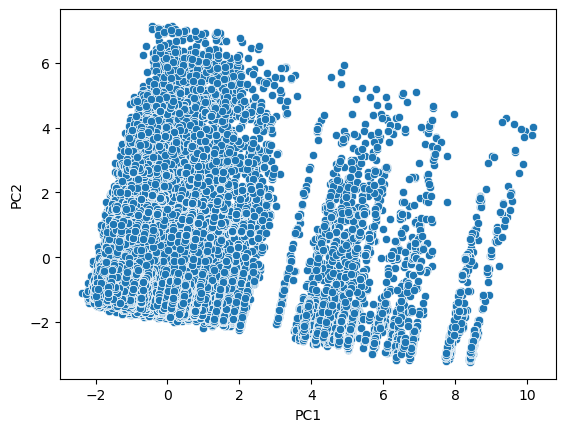

In [193]:
sns.scatterplot(x = pc_drw['PC1'] ,y =pc_drw['PC2'], data = pc_drw , palette = 'Set1')

In [194]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [195]:
## clustering 
n_clusters = np.arange(1,11)
sil_score_list = []
inertia_list = []

for cluster in n_clusters:
    K_m = KMeans(n_clusters = cluster,random_state = 101)
    K_m.fit(pc_drw)
    labels = K_m.labels_
    inertia_list.append(K_m.inertia_)
    if cluster>1:
        sil_score = silhouette_score(pc_drw,labels)
        
    else :
        sil_score = np.nan
    sil_score_list.append(sil_score)

In [196]:
sil_score_list

[nan,
 0.47535636737414333,
 0.5552291250591452,
 0.45120430249775534,
 0.439134011325984,
 0.4561011304696158,
 0.36543775532868117,
 0.3985481452087773,
 0.3872903701274612,
 0.3824364710363114]

In [197]:
inertia_list

[319706.3790740246,
 204231.82567849208,
 92501.28548750663,
 75343.0478689388,
 69166.6509254301,
 49923.59605036683,
 46178.99197284286,
 38628.81493380127,
 31968.93500442778,
 28361.85587640803]

Text(0.5, 1.0, 'Silhouette_score_Plot')

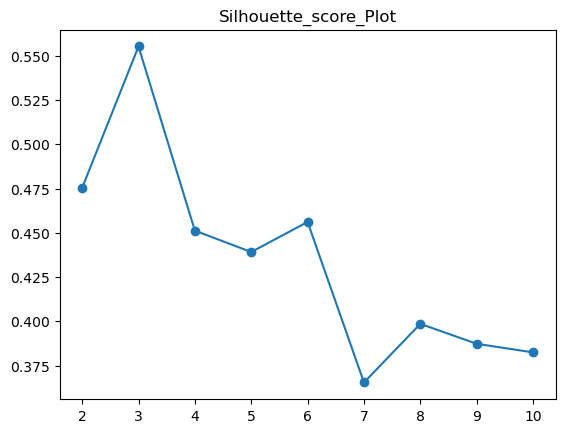

In [198]:
plt.plot(np.arange(1,11),sil_score_list,marker = 'o')
plt.title('Silhouette_score_Plot')

Text(0.5, 1.0, 'Inertia_list_plot')

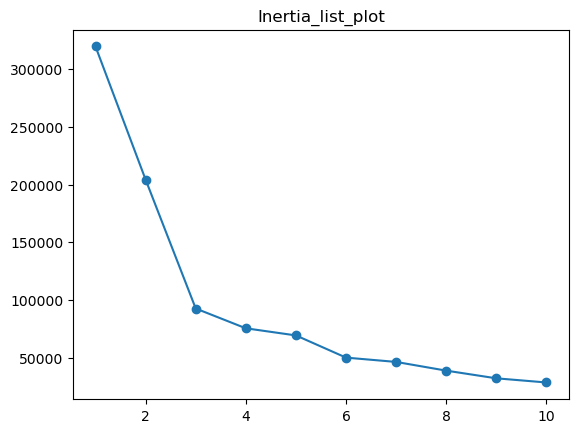

In [199]:
plt.plot(np.arange(1,11),inertia_list,marker = 'o')
plt.title('Inertia_list_plot')

In [200]:
Km = KMeans(n_clusters=3)
Km.fit(pc_drw)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [201]:
Km.labels_

array([0, 0, 0, ..., 1, 1, 1])

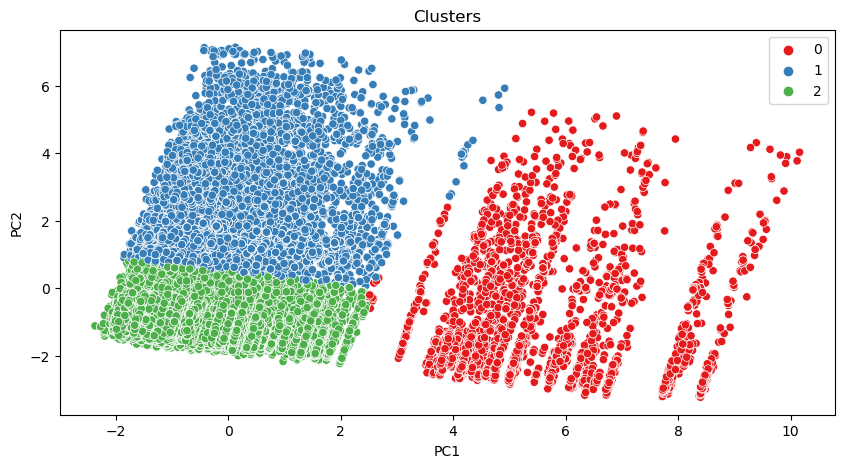

In [202]:
plt.figure(figsize = (10,5))
plt.title('Clusters')
sns.scatterplot(x = pc_drw['PC1'] , y = pc_drw['PC2'] ,hue = Km.labels_, palette = 'Set1',data = pc_drw)
plt.show()

In [203]:
np.unique(Km.labels_)

array([0, 1, 2])

In [204]:
pc_drw

,PC1,PC2
0,5.679415,0.890545
1,5.679415,0.890545
2,5.183794,-1.753545
3,5.278231,-1.448368
4,5.109243,-2.212971
...,...,...
52919,-1.425056,1.491965
52920,-1.772438,-0.442908
52921,-1.329663,2.008380
52922,-0.989003,3.926652


In [205]:
finl['Cluster'] = Km.labels_

Profiling 

In [206]:
cluster_profile = finl.groupby('Cluster').mean()
cluster_profile.reset_index(drop = True)

,Offline_Spend,Monetary,Online_Spend,Product_Category,Customer_Purchase_Frequency,Segment,Delivery_Charges,Discount_pct,Month_year,Recency,RFM_SCORE,Price_Product,Avg_Price,Quantity,Invoice_Value,Frequency
0,0.119880,3.338789,0.033896,-0.020007,1.571746,-0.432725,0.081608,-0.034277,-0.229134,-0.600756,2.887236,0.036487,0.003331,0.038233,0.056899,3.226576
1,0.126839,-0.212502,0.094101,0.803430,-0.047707,0.037789,0.007531,0.018545,0.086494,-0.035361,-0.230314,1.076546,1.121114,0.224388,1.046362,-0.243112
2,-0.078772,-0.247888,-0.052533,-0.415325,-0.143885,0.026803,-0.012671,-0.007468,-0.020353,0.082845,-0.190173,-0.563303,-0.582903,-0.120698,-0.553420,-0.219940


In [207]:
sort_ = {}
for col in cluster_profile.columns:
    sort_[col] = cluster_profile[col].sort_values(ascending = False).index.tolist()

In [208]:
sort_

{'Offline_Spend': [1, 0, 2],
 'Monetary': [0, 1, 2],
 'Online_Spend': [1, 0, 2],
 'Product_Category': [1, 0, 2],
 'Customer_Purchase_Frequency': [0, 1, 2],
 'Segment': [1, 2, 0],
 'Delivery_Charges': [0, 1, 2],
 'Discount_pct': [1, 2, 0],
 'Month_year': [1, 2, 0],
 'Recency': [2, 1, 0],
 'RFM_SCORE': [0, 2, 1],
 'Price_Product': [1, 0, 2],
 'Avg_Price': [1, 0, 2],
 'Quantity': [1, 0, 2],
 'Invoice_Value': [1, 0, 2],
 'Frequency': [0, 2, 1]}

In [209]:
profi = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in sort_.items()]))

In [210]:
profi.T

,0,1,2
Offline_Spend,1,0,2
Monetary,0,1,2
Online_Spend,1,0,2
Product_Category,1,0,2
Customer_Purchase_Frequency,0,1,2
Segment,1,2,0
Delivery_Charges,0,1,2
Discount_pct,1,2,0
Month_year,1,2,0
Recency,2,1,0


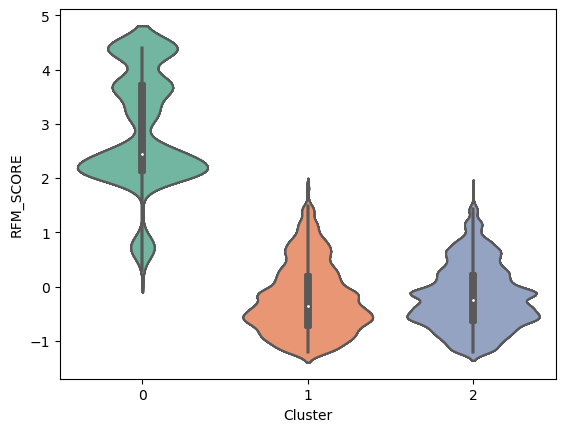

In [211]:
for col in finl.columns.drop('Cluster'):
    sns.violinplot(x = 'Cluster' , y = 'RFM_SCORE' , data = finl ,inner = 'box' , palette= 'Set2')

<Axes: xlabel='Cluster', ylabel='Invoice_Value'>

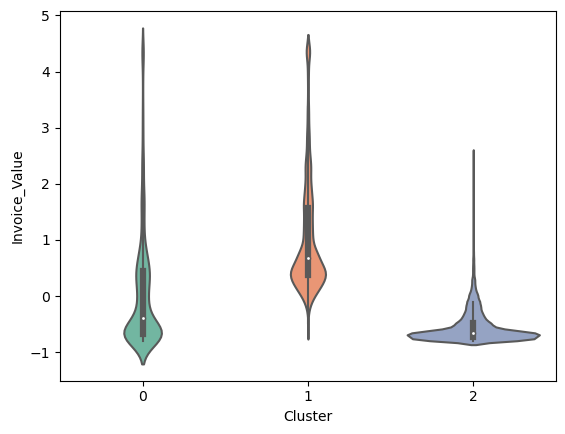

In [212]:
sns.violinplot(x = 'Cluster' , y = 'Invoice_Value' , data = finl ,inner = 'box' , palette= 'Set2')

<Axes: xlabel='Cluster', ylabel='Frequency'>

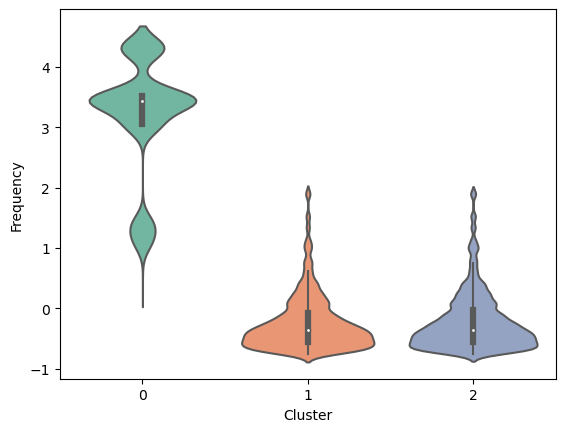

In [213]:
sns.violinplot(x = 'Cluster' , y = 'Frequency' , data = finl ,inner = 'box' , palette= 'Set2')

In [214]:
finl

,Offline_Spend,Monetary,Online_Spend,Product_Category,Customer_Purchase_Frequency,Segment,Delivery_Charges,Discount_pct,Month_year,Recency,RFM_SCORE,Price_Product,Avg_Price,Quantity,Invoice_Value,Frequency,Cluster
0,1.782934,1.916706,0.671265,0.930296,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.650889,1.670878,-0.309117,0.767599,1.389558,0
1,1.782934,1.916706,0.671265,0.930296,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.650889,1.670878,-0.309117,0.767599,1.389558,0
2,1.782934,1.916706,0.671265,1.228565,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,-0.762202,-0.809794,-0.309117,-0.789488,1.389558,0
3,1.782934,1.916706,0.671265,-1.157594,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.035375,-0.556591,0.160110,0.154811,1.389558,0
4,1.782934,1.916706,0.671265,-0.859324,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,-0.627564,-0.573438,-0.309117,-0.628810,1.389558,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,1.248829,-0.629426,0.211707,0.930296,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,0.348909,1.140754,-0.309117,0.158095,-0.733449,1
52920,1.248829,-0.629426,0.211707,-1.157594,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,-0.325491,-0.043151,-0.309117,-0.391478,-0.733449,2
52921,1.248829,-0.629426,0.211707,0.930296,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,0.633838,1.640945,-0.309117,0.402289,-0.733449,1
52922,1.248829,-0.650656,0.211707,0.930296,-1.070675,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,2.969919,0.473724,0.160110,2.404390,-0.755487,1


In [215]:
finl['Scientific_K_mean'] = finl['Cluster'].map({0:'Loyal_Cust',1:'Low_Value_Cust',2:'High_Spender'})

In [216]:
finl['Customer_Lifetime_Value'] = pd.qcut(finl['Invoice_Value'],q = 3 , labels = ['High_Value','Medium_Value','Low_Value'])

In [217]:
finl.drop(columns = 'Cluster', inplace = True)

In [218]:
finl

,Offline_Spend,Monetary,Online_Spend,Product_Category,Customer_Purchase_Frequency,Segment,Delivery_Charges,Discount_pct,Month_year,Recency,RFM_SCORE,Price_Product,Avg_Price,Quantity,Invoice_Value,Frequency,Scientific_K_mean,Customer_Lifetime_Value
0,1.782934,1.916706,0.671265,0.930296,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.650889,1.670878,-0.309117,0.767599,1.389558,Loyal_Cust,Low_Value
1,1.782934,1.916706,0.671265,0.930296,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.650889,1.670878,-0.309117,0.767599,1.389558,Loyal_Cust,Low_Value
2,1.782934,1.916706,0.671265,1.228565,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,-0.762202,-0.809794,-0.309117,-0.789488,1.389558,Loyal_Cust,High_Value
3,1.782934,1.916706,0.671265,-1.157594,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,0.035375,-0.556591,0.160110,0.154811,1.389558,Loyal_Cust,Low_Value
4,1.782934,1.916706,0.671265,-0.859324,4.357913,-2.312910,-0.296926,-1.224673,-0.394401,2.322955,3.201761,-0.627564,-0.573438,-0.309117,-0.628810,1.389558,Loyal_Cust,Medium_Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,1.248829,-0.629426,0.211707,0.930296,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,0.348909,1.140754,-0.309117,0.158095,-0.733449,Low_Value_Cust,Low_Value
52920,1.248829,-0.629426,0.211707,-1.157594,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,-0.325491,-0.043151,-0.309117,-0.391478,-0.733449,High_Spender,Medium_Value
52921,1.248829,-0.629426,0.211707,0.930296,-0.912176,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,0.633838,1.640945,-0.309117,0.402289,-0.733449,Low_Value_Cust,Low_Value
52922,1.248829,-0.650656,0.211707,0.930296,-1.070675,-0.257249,-0.296926,1.236199,-0.970773,-1.200463,-1.209212,2.969919,0.473724,0.160110,2.404390,-0.755487,Low_Value_Cust,Low_Value


In [219]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
finl['Scientific_K_mean'] = lb.fit_transform(finl['Scientific_K_mean'])
finl['Customer_Lifetime_Value'] = lb.fit_transform(finl['Customer_Lifetime_Value'])

In [220]:
## Classification_model 

In [221]:
X_var = finl.columns.difference(['Customer_Lifetime_Value'])
Y_var = finl['Customer_Lifetime_Value']

In [222]:
finl_x = finl[X_var]

In [223]:
from sklearn.model_selection import train_test_split

Train_X,Test_X,Train_Y,Test_Y = train_test_split(finl_x,Y_var,test_size=0.2,random_state= 101)

In [224]:
from sklearn.metrics import classification_report,accuracy_score,r2_score

In [225]:
from sklearn.linear_model import LogisticRegression

Logistic = LogisticRegression(multi_class = 'multinomial')
Logistic.fit(Train_X,Train_Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [226]:
train_predict = Logistic.predict(Train_X)

In [227]:
print('Train_Accuracy :' , accuracy_score(train_predict,Train_Y))
print('Train_Classification_Report :' ,classification_report(train_predict,Train_Y))

test_predict = Logistic.predict(Test_X)

print('Test_Accuracy :' ,accuracy_score(test_predict,Test_Y))
print('Test_Classification_Report :',classification_report(test_predict,Test_Y))

Train_Accuracy : 0.9795696639032571
Train_Classification_Report :               precision    recall  f1-score   support

           0       0.99      0.97      0.98     14523
           1       1.00      0.98      0.99     14303
           2       0.95      0.99      0.97     13513

    accuracy                           0.98     42339
   macro avg       0.98      0.98      0.98     42339
weighted avg       0.98      0.98      0.98     42339

Test_Accuracy : 0.9785545583372697
Test_Classification_Report :               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3644
           1       1.00      0.98      0.99      3576
           2       0.95      0.99      0.97      3365

    accuracy                           0.98     10585
   macro avg       0.98      0.98      0.98     10585
weighted avg       0.98      0.98      0.98     10585



In [229]:
metrics = {'Accuracy_Test_Data': accuracy_score(test_predict,Test_Y),'Classification_Report_Test':classification_report(test_predict,Test_Y)}

In [230]:
import xgboost

In [231]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate  = 0.01)
xgb.fit(Train_X,Train_Y)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [232]:
xgb_predict_train = xgb.predict(Train_X)
xgb_predict_test =  xgb.predict(Test_X)

print('Train_Accuracy :' , accuracy_score(xgb_predict_train,Train_Y))
print('Train_Classification_Report :' ,classification_report(xgb_predict_train,Train_Y))

print('Test_Accuracy :' ,accuracy_score(xgb_predict_test,Test_Y))
print('Test_Classification_Report :',classification_report(xgb_predict_test,Test_Y))

Train_Accuracy : 1.0
Train_Classification_Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14220
           1       1.00      1.00      1.00     14075
           2       1.00      1.00      1.00     14044

    accuracy                           1.00     42339
   macro avg       1.00      1.00      1.00     42339
weighted avg       1.00      1.00      1.00     42339

Test_Accuracy : 0.9999055266887105
Test_Classification_Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3576
           1       1.00      1.00      1.00      3506
           2       1.00      1.00      1.00      3503

    accuracy                           1.00     10585
   macro avg       1.00      1.00      1.00     10585
weighted avg       1.00      1.00      1.00     10585



In [233]:
metrics_xg= {'Accuracy_Test_Data': accuracy_score(xgb_predict_test,Test_Y),'Classification_Report_Test':classification_report(xgb_predict_test,Test_Y)}


In [234]:
Apriori = combine_table[['Product_SKU','Transaction_ID','Quantity']]

In [235]:
apriori_table = pd.pivot_table(index ='Transaction_ID',columns='Product_SKU',values = 'Quantity', aggfunc= 'sum',data = Apriori).fillna(0)

In [236]:
apriori_table = apriori_table.applymap(lambda x : 1 if x>0 else 0 )

In [237]:
apriori_table

Product_SKU,GGOEA0CH077599,GGOEAAAB034813,GGOEAAAB034814,GGOEAAAB034815,GGOEAAAB034816,GGOEAAAB034817,GGOEAAAB034913,GGOEAAAB034914,GGOEAAAB034915,GGOEAAAB034916,...,GGOEYHPA003510,GGOEYHPA003610,GGOEYHPB072210,GGOEYOBR078599,GGOEYOCB092699,GGOEYOCR077399,GGOEYOCR077799,GGOEYOCR078099,GGOEYOLR018699,GGOEYOLR080599
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
apriori_table['GGOEA0CH077599'].sum()

16

In [239]:
## col where the sum of transaction is greater than 5

min_trans_col = []
for col in apriori_table.columns:
    if apriori_table[col].sum() >=5 :
        min_trans_col.append(col)

In [240]:
unique_values,counts = np.unique(min_trans_col,return_counts= True)

In [241]:
counts.sum()

893

In [242]:
apriori_table = apriori_table[min_trans_col]

In [243]:
from mlxtend.frequent_patterns import apriori,association_rules

In [244]:
frequent_itemsets = apriori(apriori_table,min_support=0.01,use_colnames = True)
Rules = association_rules(frequent_itemsets,metric = 'lift',min_threshold=1)

C:\Users\Harshita Sahu\Downloads\New folder\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [245]:

Rules_table = Rules.groupby(['antecedents','consequents'])[['support','confidence','lift']].mean().sort_values(by = ['support','confidence','lift'],ascending = False)

In [246]:
antecedents = Rules['antecedents']

In [247]:
consequents = Rules['consequents']

In [248]:
Rules['support']

0    0.010654
1    0.010654
2    0.027653
3    0.027653
Name: support, dtype: float64

In [249]:
labels = Rules['antecedents'].astype('str') + '-->' + Rules['consequents'].astype('str')
labels

0    frozenset({'GGOEGHGC019799'})-->frozenset({'GG...
1    frozenset({'GGOEGHGR019499'})-->frozenset({'GG...
2    frozenset({'GGOENEBB078899'})-->frozenset({'GG...
3    frozenset({'GGOENEBQ078999'})-->frozenset({'GG...
dtype: object

In [250]:
days_btw_transaction = combine_table.groupby('CustomerID')['Transaction_Date'].diff().dt.days
combine_table['days_btw_transaction'] = days_btw_transaction
combine_table

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,week,Recency,Monetary,Frequency,RFM_SCORE,Recency_Score,Frequency_Score,Monetary_Score,Segment,days_btw_transaction
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,339,37649.28181,297,74519.28181,4,4,4,Gold,NaN
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,339,37649.28181,297,74519.28181,4,4,4,Gold,0.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,1,339,37649.28181,297,74519.28181,4,4,4,Gold,0.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,1,339,37649.28181,297,74519.28181,4,4,4,Gold,0.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,1,339,37649.28181,297,74519.28181,4,4,4,Gold,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,1,0,891.00257,8,971.00257,1,1,1,Primary,0.0
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,1,0,891.00257,8,971.00257,1,1,1,Primary,0.0
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,1,0,891.00257,8,971.00257,1,1,1,Primary,0.0
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,1,0,584.49360,2,604.49360,1,1,1,Primary,NaN


In [251]:
Repeat_cust = combine_table[combine_table['days_btw_transaction']>1]
Repeat_customer = Repeat_cust.groupby('CustomerID')['days_btw_transaction'].mean().reset_index(name = 'Avg_transaction_repeat_cust')
Repeat_cust_table = Repeat_customer.merge(combine_table,how = 'left',on= 'CustomerID')
Repeat_cust_table = Repeat_cust_table.groupby('CustomerID').agg({'Avg_transaction_repeat_cust':'sum','Quantity':'sum','Avg_Price':'sum','RFM_SCORE':'mean','Monetary':'sum'}).reset_index()
Repeat_cust_table['next_purchased_bin'] = pd.cut(Repeat_cust_table['Avg_transaction_repeat_cust'],bins = [0,30,60,90,float('inf')],labels = ['0-30', '30-60'
, '60-90', '90+'])
X_repeat = Repeat_cust_table[Repeat_cust_table.columns.difference(['CustomerID','next_purchased_bin'])]
Y_repeat = Repeat_cust_table['next_purchased_bin']

In [253]:
from sklearn.model_selection import train_test_split
Train_X_repeat,Test_X_repeat,Train_Y_repeat,Test_Y_repeat = train_test_split(X_repeat,Y_repeat,test_size=0.2,random_state= 101)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
logit = LogisticRegression(multi_class = 'multinomial')

logit.fit(Train_X_repeat,Train_Y_repeat)
logit_predict_repeat_train = logit.predict(Train_X_repeat)
accuracy_score(logit_predict_repeat_train,Train_Y_repeat)
logit_predict_repeat_test = logit.predict(Test_X_repeat)
accuracy_score(logit_predict_repeat_test,Test_Y_repeat)

0.9758064516129032

In [254]:
metrics_repeat= {'Accuracy_Test_Data': accuracy_score(logit_predict_repeat_test,Test_Y_repeat)}
metrics_repeat

{'Accuracy_Test_Data': 0.9758064516129032}

In [255]:
Repeat_cust_table

,CustomerID,Avg_transaction_repeat_cust,Quantity,Avg_Price,RFM_SCORE,Monetary,next_purchased_bin
0,12347,13320.0,342,3746.16,18559.17780,723550.66800,90+
1,12348,2737.0,209,336.52,9031.92620,34544.30260,90+
2,12370,2730.0,613,3965.71,26532.00732,611702.66612,90+
3,12377,10703.0,421,5060.61,14502.13288,749374.23176,90+
4,12383,2449.5,185,3078.59,15828.64046,361466.19174,90+
...,...,...,...,...,...,...,...
611,18239,7826.0,140,3722.79,10303.23340,331928.13680,90+
612,18245,8030.0,86,4779.56,11283.52194,408843.70670,90+
613,18260,2100.0,141,1114.89,11673.65633,102946.25320,90+
614,18269,608.0,10,89.34,19635.66092,1245.28736,90+


In [256]:
next_purchased_bin_ = Repeat_cust_table.groupby('next_purchased_bin')['CustomerID'].size().reset_index()
next_purchased_bin_

,next_purchased_bin,CustomerID
0,0-30,3
1,30-60,2
2,60-90,4
3,90+,607


Text(0.5, 1.0, 'Purchased_bin Distribution')

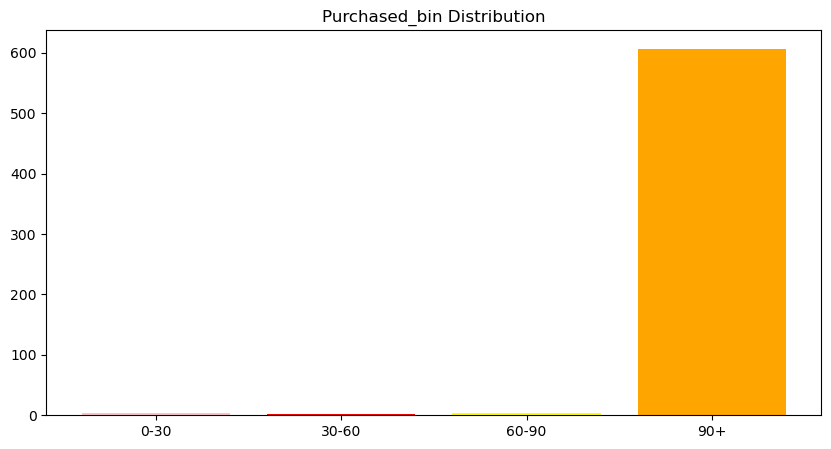

In [257]:
plt.figure(figsize=(10,5))
colors = ['pink','red','yellow','orange']
plt.bar('next_purchased_bin','CustomerID',data = next_purchased_bin_ , color = colors )
plt.title('Purchased_bin Distribution')

In [258]:
combine_table['Customer_Type']

0        New_Customer
1        New_Customer
2        New_Customer
3        New_Customer
4        New_Customer
             ...     
52919    New_Customer
52920    New_Customer
52921    New_Customer
52922    New_Customer
52923    New_Customer
Name: Customer_Type, Length: 52924, dtype: object

In [259]:
combine_table.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_year', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST', 'Invoice_Value', 'Price_Product',
       'Average_Order_Value', 'Customer_Purchase_Frequency',
       'First_Transaction', 'Customer_Type', 'Day', 'week', 'Recency',
       'Monetary', 'Frequency', 'RFM_SCORE', 'Recency_Score',
       'Frequency_Score', 'Monetary_Score', 'Segment', 'days_btw_transaction'],
      dtype='object')

In [260]:
cohort = combine_table.groupby(['CustomerID','Transaction_Date','Month_year']).agg({'Customer_Purchase_Frequency':'sum','RFM_SCORE':'mean','days_btw_transaction':'sum','Recency':'sum','Quantity':'sum'}).reset_index()
#.agg({'Recency':'sum','Quantity':'sum','RFM_SCORE':'mean','Invoice_Value':'sum','Customer_Purchase_Frequency':'sum'})

In [261]:
cohort['first_trans'] = cohort.groupby('CustomerID')['Transaction_Date'].transform('min')

In [262]:
cohort['days_btw_tran'] = ( cohort['Transaction_Date'] -cohort['first_trans'] ).dt.days//30

In [263]:
cohort

,CustomerID,Transaction_Date,Month_year,Customer_Purchase_Frequency,RFM_SCORE,days_btw_transaction,Recency,Quantity,first_trans,days_btw_tran
0,12346,2019-09-15,Sep,0.001035,10894.98174,0.0,214,3,2019-09-15,0
1,12347,2019-03-24,Mar,0.202411,18559.17780,0.0,1829,305,2019-03-24,0
2,12347,2019-11-01,Nov,0.031551,18559.17780,222.0,236,6,2019-03-24,7
3,12347,2019-11-02,Nov,0.197195,18559.17780,1.0,1475,31,2019-03-24,7
4,12348,2019-06-22,Jun,0.035052,9031.92620,0.0,1241,65,2019-06-22,0
...,...,...,...,...,...,...,...,...,...,...
3203,18269,2019-04-05,Apr,0.003861,19635.66092,0.0,1358,9,2019-04-05,0
3204,18269,2019-06-20,Jun,0.000515,19635.66092,76.0,194,1,2019-04-05,2
3205,18277,2019-10-23,Oct,0.000471,7211.02000,0.0,69,2,2019-10-23,0
3206,18283,2019-07-29,Jul,0.602885,16167.81327,0.0,4674,91,2019-07-29,0


## Cohort Behaviour Analysis

In [264]:
cohort_behavior = cohort.groupby(['Month_year','first_trans']).agg({'Customer_Purchase_Frequency':'sum','RFM_SCORE':'sum','days_btw_transaction':'sum','Recency':'sum','Quantity':'sum'})

In [265]:

cohort_behavior_ = cohort_behavior.groupby('Month_year').agg({'Customer_Purchase_Frequency':'sum','RFM_SCORE':'sum','days_btw_transaction':'sum','Recency':'sum','Quantity':'sum'})

Text(0.5, 1.0, 'Cohort_Behaviour_Analysis')

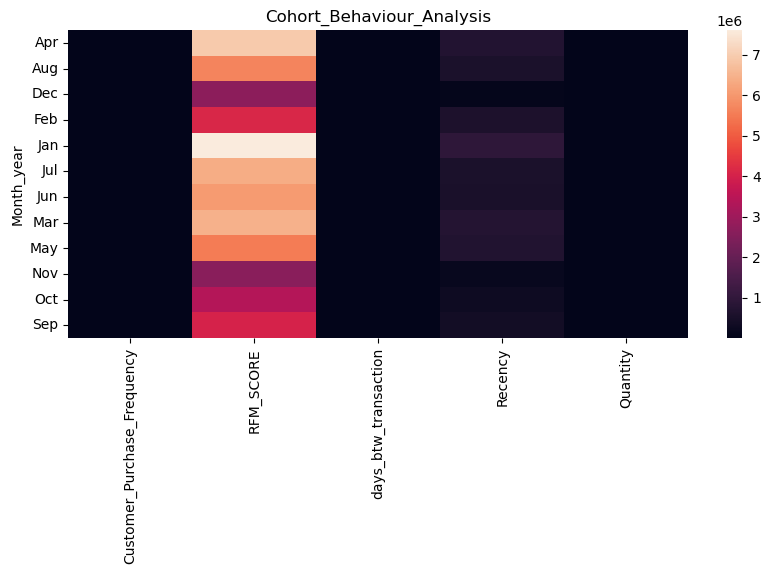

In [267]:
plt.figure(figsize = (10,4))
sns.heatmap(cohort_behavior_)
plt.title('Cohort_Behaviour_Analysis')

In [268]:
cohort['Month_No'] = cohort['Transaction_Date'].dt.month

In [269]:
cohort_ = cohort.groupby(['Month_year','first_trans','Month_No'])['CustomerID'].nunique().reset_index()
cohort_.shape

(1124, 4)

In [270]:
cohort_['Period_Number'] =(cohort_['Month_No'] - cohort_['first_trans'].dt.month)
cohort_

,Month_year,first_trans,Month_No,CustomerID,Period_Number
0,Apr,2019-01-02,4,2,3
1,Apr,2019-01-03,4,2,3
2,Apr,2019-01-05,4,2,3
3,Apr,2019-01-06,4,1,3
4,Apr,2019-01-08,4,1,3
...,...,...,...,...,...
1119,Sep,2019-09-25,9,1,0
1120,Sep,2019-09-26,9,5,0
1121,Sep,2019-09-27,9,5,0
1122,Sep,2019-09-28,9,5,0


In [271]:
Retention_cust_month = pd.pivot_table(data = cohort_,values = 'CustomerID',index = 'Month_year',columns = 'Period_Number').fillna(0)
Retention_cust_month

Period_Number,0,1,2,3,4,5,6,7,8,9,10,11
Month_year,,,,,,,,,,,,
Apr,5.433333,1.058824,1.285714,1.619048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Aug,4.354839,1.181818,1.375000,1.181818,1.285714,1.833333,1.583333,2.238095,0.000000,0.000000,0.000000,0.0
Dec,3.785714,1.166667,1.333333,1.000000,1.142857,1.125000,1.100000,1.000000,1.090909,1.357143,1.230769,1.7
Feb,3.555556,1.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Jan,6.935484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Jul,3.357143,1.333333,1.125000,1.600000,2.000000,1.466667,1.666667,0.000000,0.000000,0.000000,0.000000,0.0
Jun,4.724138,1.090909,1.600000,1.785714,1.416667,1.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Mar,5.900000,1.000000,1.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
May,3.733333,1.166667,2.187500,1.333333,1.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [272]:
### here the 0 how many customer joined 
### 1,2,3.... how many customer came back for purchase